<a href="https://colab.research.google.com/github/Nancy240/Health-Monitoring/blob/main/analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smart Health Monitoring System using Different types of Machine Learning Algorithm.**



# **Package Importing**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Dataset Reading**

In [5]:
Input_data = pd.read_csv("/content/patient_health_data.csv")
Input_data

,Patient ID,Heart Rate (bpm),SpO2 (%),Sleep Duration (hrs),Light Sleep (hrs),Deep Sleep (hrs),REM Sleep (hrs),Steps Count,Calories Burned,Distance Walked (km),Stress Level (1-10),Respiratory Rate (breaths/min),"ECG (Normal=1, Irregular=0)",Blood Pressure (Sys/Dia),Skin Temperature (°C),"Menstrual Cycle (Yes=1, No=0)","Fall Detected (Yes=1, No=0)",Water Intake (litres)
0,1,87,95,7.5,3.1,1.2,3.2,6922,308,3.9,8,16,1,138/93,37.1,1,1,1.7
1,2,88,100,7.5,5.2,1.1,1.2,6409,318,5.2,1,19,0,138/79,37.0,1,0,2.2
2,1,64,98,5.9,3.1,1.2,1.6,7705,365,5.4,4,18,0,129/73,36.7,0,0,2.3
3,2,81,99,5.9,3.8,1.2,0.9,10153,235,3.3,9,14,0,125/70,37.2,0,1,1.7
4,1,61,99,7.7,3.8,2.6,1.3,11796,219,4.1,2,19,0,118/95,36.5,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,82,98,8.0,3.2,1.8,3.0,12133,354,3.9,10,16,0,116/79,37.0,1,1,1.7
146,1,97,97,5.6,3.6,1.3,0.7,11032,333,7.2,2,14,0,125/81,37.0,0,0,3.0
147,2,62,100,8.9,4.5,1.6,2.8,5363,276,4.5,1,14,1,113/70,37.1,1,0,2.0
148,1,73,97,8.8,5.7,2.7,0.4,6883,392,7.5,1,15,1,133/70,36.9,1,1,2.3


In [8]:
np.random.seed(42)  # For reproducibility
Input_data['Gender (Male=0, Female=1)'] = np.random.choice([0, 1], size=len(Input_data))

In [9]:
Input_data.loc[Input_data['Gender (Male=0, Female=1)'] == 0, 'Menstrual Cycle (Yes=1, No=0)'] = 0

In [10]:
Input_data[['Systolic', 'Diastolic']] = Input_data['Blood Pressure (Sys/Dia)'].str.split('/', expand=True)
Input_data['Systolic'] = pd.to_numeric(Input_data['Systolic'])
Input_data['Diastolic'] = pd.to_numeric(Input_data['Diastolic'])

In [11]:
# Drop the original 'Blood Pressure (Sys/Dia)' column
Input_data = Input_data.drop('Blood Pressure (Sys/Dia)', axis=1)

In [12]:
Input_data

,Patient ID,Heart Rate (bpm),SpO2 (%),Sleep Duration (hrs),Light Sleep (hrs),Deep Sleep (hrs),REM Sleep (hrs),Steps Count,Calories Burned,Distance Walked (km),Stress Level (1-10),Respiratory Rate (breaths/min),"ECG (Normal=1, Irregular=0)",Skin Temperature (°C),"Menstrual Cycle (Yes=1, No=0)","Fall Detected (Yes=1, No=0)",Water Intake (litres),"Gender (Male=0, Female=1)",Systolic,Diastolic
0,1,87,95,7.5,3.1,1.2,3.2,6922,308,3.9,8,16,1,37.1,0,1,1.7,0,138,93
1,2,88,100,7.5,5.2,1.1,1.2,6409,318,5.2,1,19,0,37.0,1,0,2.2,1,138,79
2,1,64,98,5.9,3.1,1.2,1.6,7705,365,5.4,4,18,0,36.7,0,0,2.3,0,129,73
3,2,81,99,5.9,3.8,1.2,0.9,10153,235,3.3,9,14,0,37.2,0,1,1.7,0,125,70
4,1,61,99,7.7,3.8,2.6,1.3,11796,219,4.1,2,19,0,36.5,0,0,2.0,0,118,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2,82,98,8.0,3.2,1.8,3.0,12133,354,3.9,10,16,0,37.0,0,1,1.7,0,116,79
146,1,97,97,5.6,3.6,1.3,0.7,11032,333,7.2,2,14,0,37.0,0,0,3.0,0,125,81
147,2,62,100,8.9,4.5,1.6,2.8,5363,276,4.5,1,14,1,37.1,0,0,2.0,0,113,70
148,1,73,97,8.8,5.7,2.7,0.4,6883,392,7.5,1,15,1,36.9,0,1,2.3,0,133,70


# **Data PreProcessing**

In [13]:
Input_data.head()

,Patient ID,Heart Rate (bpm),SpO2 (%),Sleep Duration (hrs),Light Sleep (hrs),Deep Sleep (hrs),REM Sleep (hrs),Steps Count,Calories Burned,Distance Walked (km),Stress Level (1-10),Respiratory Rate (breaths/min),"ECG (Normal=1, Irregular=0)",Skin Temperature (°C),"Menstrual Cycle (Yes=1, No=0)","Fall Detected (Yes=1, No=0)",Water Intake (litres),"Gender (Male=0, Female=1)",Systolic,Diastolic
0,1,87,95,7.5,3.1,1.2,3.2,6922,308,3.9,8,16,1,37.1,0,1,1.7,0,138,93
1,2,88,100,7.5,5.2,1.1,1.2,6409,318,5.2,1,19,0,37.0,1,0,2.2,1,138,79
2,1,64,98,5.9,3.1,1.2,1.6,7705,365,5.4,4,18,0,36.7,0,0,2.3,0,129,73
3,2,81,99,5.9,3.8,1.2,0.9,10153,235,3.3,9,14,0,37.2,0,1,1.7,0,125,70
4,1,61,99,7.7,3.8,2.6,1.3,11796,219,4.1,2,19,0,36.5,0,0,2.0,0,118,95


In [14]:
Input_data.tail()

,Patient ID,Heart Rate (bpm),SpO2 (%),Sleep Duration (hrs),Light Sleep (hrs),Deep Sleep (hrs),REM Sleep (hrs),Steps Count,Calories Burned,Distance Walked (km),Stress Level (1-10),Respiratory Rate (breaths/min),"ECG (Normal=1, Irregular=0)",Skin Temperature (°C),"Menstrual Cycle (Yes=1, No=0)","Fall Detected (Yes=1, No=0)",Water Intake (litres),"Gender (Male=0, Female=1)",Systolic,Diastolic
145,2,82,98,8.0,3.2,1.8,3.0,12133,354,3.9,10,16,0,37.0,0,1,1.7,0,116,79
146,1,97,97,5.6,3.6,1.3,0.7,11032,333,7.2,2,14,0,37.0,0,0,3.0,0,125,81
147,2,62,100,8.9,4.5,1.6,2.8,5363,276,4.5,1,14,1,37.1,0,0,2.0,0,113,70
148,1,73,97,8.8,5.7,2.7,0.4,6883,392,7.5,1,15,1,36.9,0,1,2.3,0,133,70
149,2,80,95,7.1,2.9,2.9,1.3,9897,352,5.9,9,18,0,36.6,0,0,1.6,1,113,94


In [15]:
Input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      150 non-null    int64  
 1   Heart Rate (bpm)                150 non-null    int64  
 2   SpO2 (%)                        150 non-null    int64  
 3   Sleep Duration (hrs)            150 non-null    float64
 4   Light Sleep (hrs)               150 non-null    float64
 5   Deep Sleep (hrs)                150 non-null    float64
 6   REM Sleep (hrs)                 150 non-null    float64
 7   Steps Count                     150 non-null    int64  
 8   Calories Burned                 150 non-null    int64  
 9   Distance Walked (km)            150 non-null    float64
 10  Stress Level (1-10)             150 non-null    int64  
 11  Respiratory Rate (breaths/min)  150 non-null    int64  
 12  ECG (Normal=1, Irregular=0)     150 

In [16]:
Input_data.isnull().sum()

,0
Patient ID,0
Heart Rate (bpm),0
SpO2 (%),0
Sleep Duration (hrs),0
Light Sleep (hrs),0
Deep Sleep (hrs),0
REM Sleep (hrs),0
Steps Count,0
Calories Burned,0
Distance Walked (km),0


In [17]:
Input_data['Stress Level (1-10)'].value_counts()

,count
Stress Level (1-10),
1,22
9,19
7,16
3,15
4,15
6,14
10,14
8,12
2,12


In [18]:
Input_data['ECG (Normal=1, Irregular=0)'].value_counts()

,count
"ECG (Normal=1, Irregular=0)",
1,79
0,71


In [19]:
Input_data['Menstrual Cycle (Yes=1, No=0)'].value_counts()

,count
"Menstrual Cycle (Yes=1, No=0)",
0,109
1,41


In [20]:
Input_data['Fall Detected (Yes=1, No=0)'].value_counts()

,count
"Fall Detected (Yes=1, No=0)",
0,94
1,56


In [22]:
print(Input_data['Gender (Male=0, Female=1)'].value_counts())

Gender (Male=0, Female=1)
1    82
0    68
Name: count, dtype: int64


In [23]:
Input_data.shape

(150, 20)

# **Data Visualization**

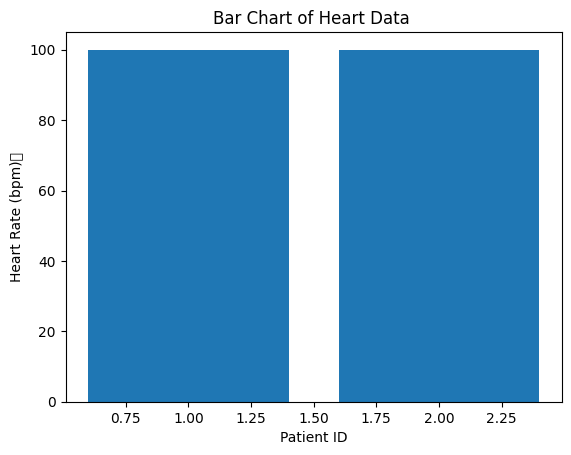

In [ ]:
plt.bar(Input_data['Patient ID'],Input_data['Heart Rate (bpm)'])
plt.title("Bar Chart of Heart Data ")
plt.xlabel('Patient ID')
plt.ylabel('Heart Rate (bpm)	')
plt.show()

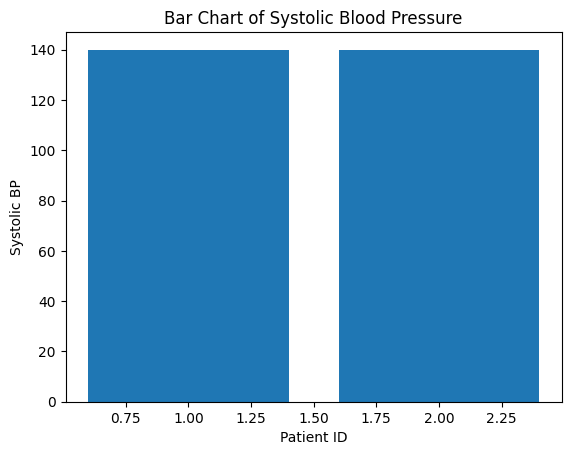

In [24]:
plt.bar(Input_data['Patient ID'], Input_data['Systolic'])
plt.title("Bar Chart of Systolic Blood Pressure")
plt.xlabel('Patient ID')
plt.ylabel('Systolic BP')
plt.show()

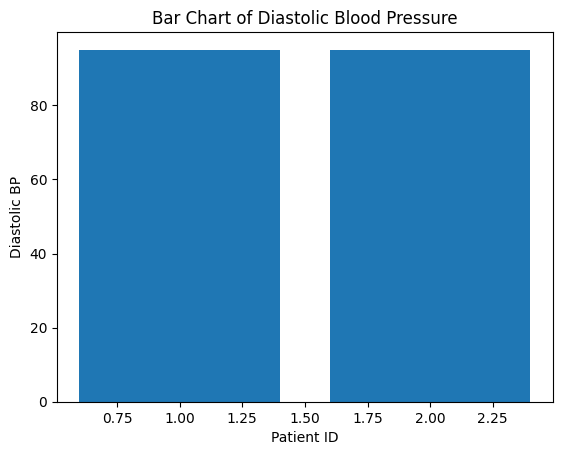

In [25]:
plt.bar(Input_data['Patient ID'], Input_data['Diastolic'])
plt.title("Bar Chart of Diastolic Blood Pressure")
plt.xlabel('Patient ID')
plt.ylabel('Diastolic BP')
plt.show()

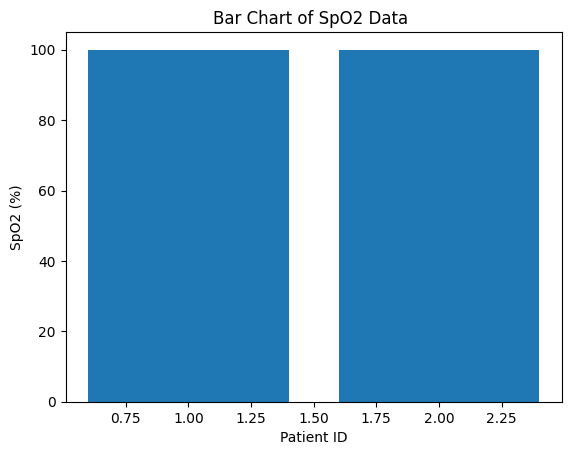

In [26]:
plt.bar(Input_data['Patient ID'],Input_data['SpO2 (%)'])
plt.title("Bar Chart of SpO2 Data ")
plt.xlabel('Patient ID')
plt.ylabel('SpO2 (%)')
plt.show()

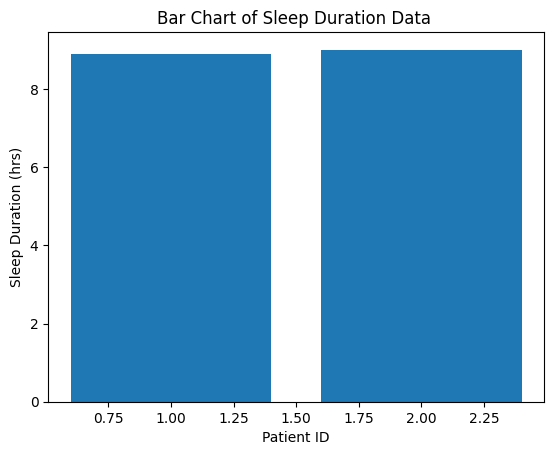

In [27]:
plt.bar(Input_data['Patient ID'],Input_data['Sleep Duration (hrs)'])
plt.title("Bar Chart of Sleep Duration Data ")
plt.xlabel('Patient ID')
plt.ylabel('Sleep Duration (hrs)')
plt.show()

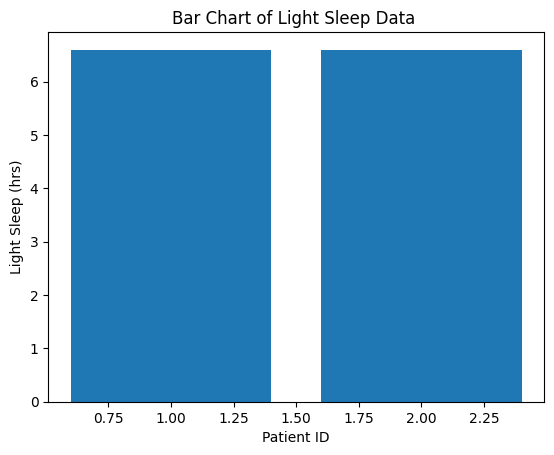

In [28]:
plt.bar(Input_data['Patient ID'],Input_data['Light Sleep (hrs)'])
plt.title("Bar Chart of Light Sleep Data ")
plt.xlabel('Patient ID')
plt.ylabel('Light Sleep (hrs)')
plt.show()

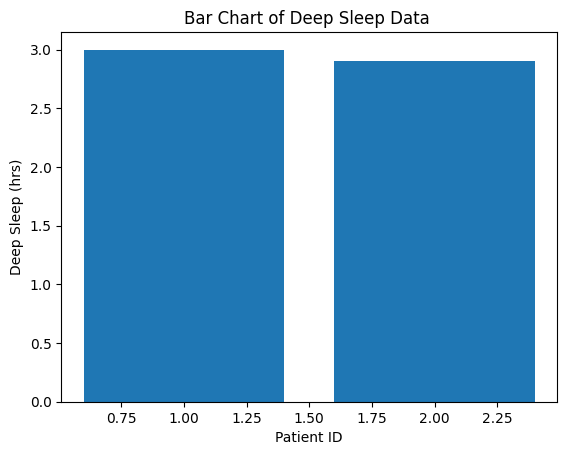

In [29]:
plt.bar(Input_data['Patient ID'],Input_data['Deep Sleep (hrs)'])
plt.title("Bar Chart of Deep Sleep Data ")
plt.xlabel('Patient ID')
plt.ylabel('Deep Sleep (hrs)')
plt.show()

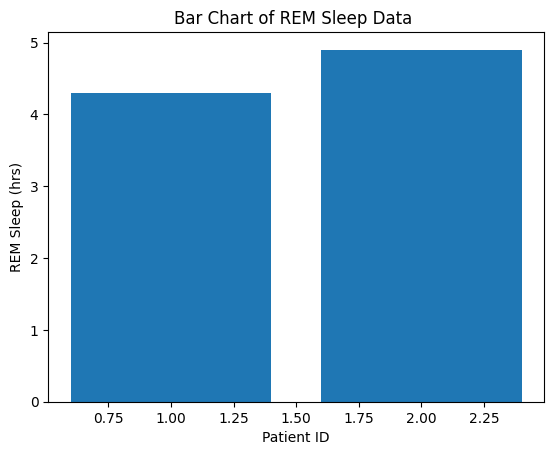

In [30]:
plt.bar(Input_data['Patient ID'],Input_data['REM Sleep (hrs)'])
plt.title("Bar Chart of REM Sleep Data ")
plt.xlabel('Patient ID')
plt.ylabel('REM Sleep (hrs)')
plt.show()

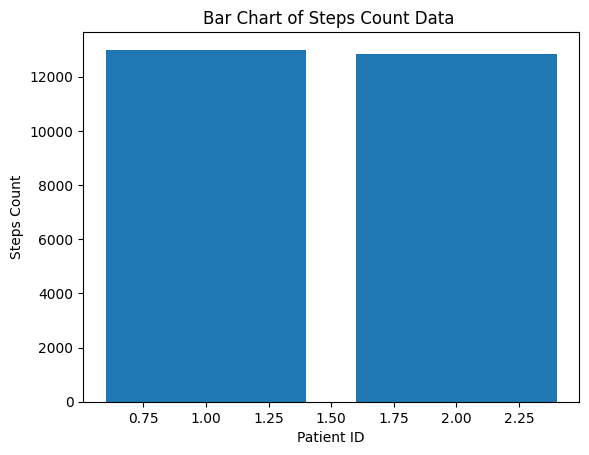

In [31]:
plt.bar(Input_data['Patient ID'],Input_data['Steps Count'])
plt.title("Bar Chart of Steps Count Data ")
plt.xlabel('Patient ID')
plt.ylabel('Steps Count')
plt.show()

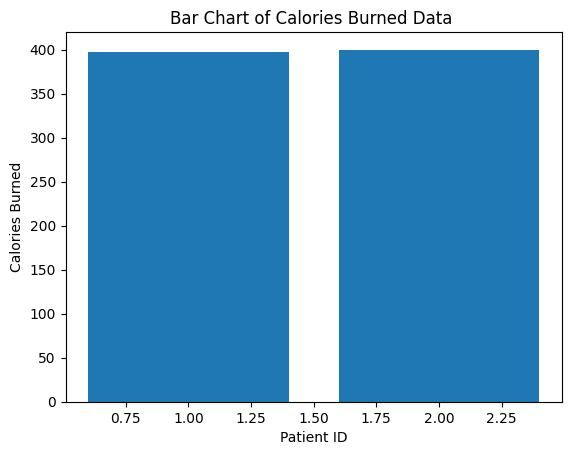

In [32]:
plt.bar(Input_data['Patient ID'],Input_data['Calories Burned'])
plt.title("Bar Chart of Calories Burned Data ")
plt.xlabel('Patient ID')
plt.ylabel('Calories Burned')
plt.show()

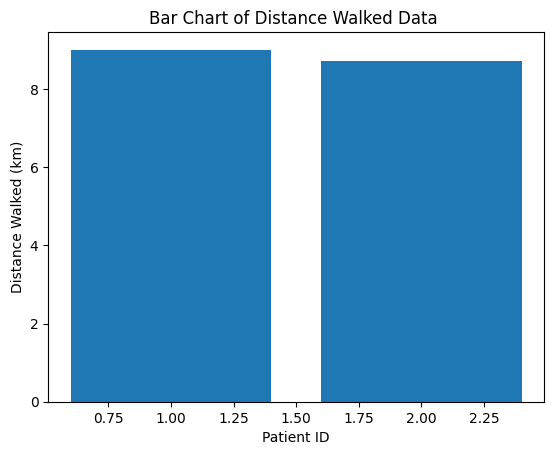

In [33]:
plt.bar(Input_data['Patient ID'],Input_data['Distance Walked (km)'])
plt.title("Bar Chart of Distance Walked Data ")
plt.xlabel('Patient ID')
plt.ylabel('Distance Walked (km)')
plt.show()

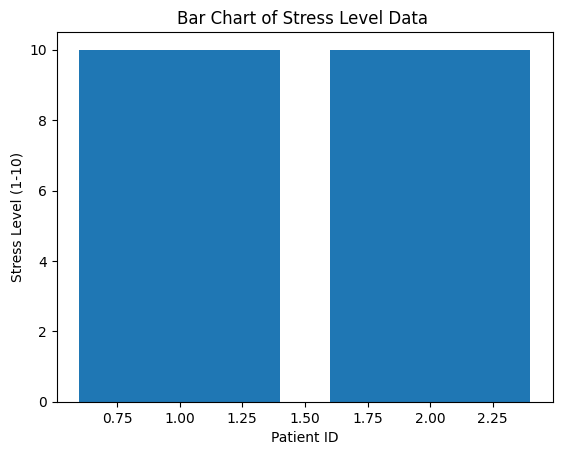

In [34]:
plt.bar(Input_data['Patient ID'],Input_data['Stress Level (1-10)'])
plt.title("Bar Chart of Stress Level Data ")
plt.xlabel('Patient ID')
plt.ylabel('Stress Level (1-10)')
plt.show()

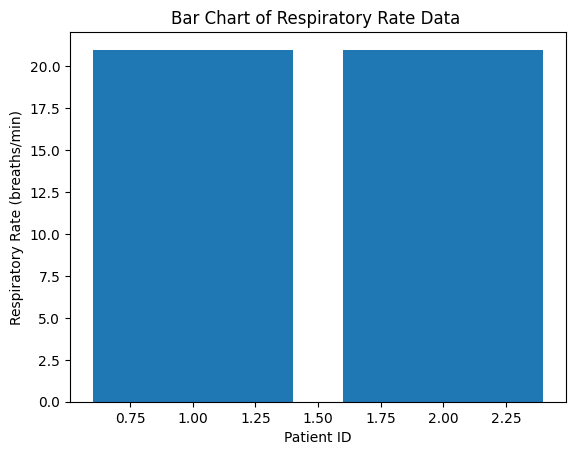

In [35]:
plt.bar(Input_data['Patient ID'],Input_data['Respiratory Rate (breaths/min)'])
plt.title("Bar Chart of Respiratory Rate Data ")
plt.xlabel('Patient ID')
plt.ylabel('Respiratory Rate (breaths/min)')
plt.show()

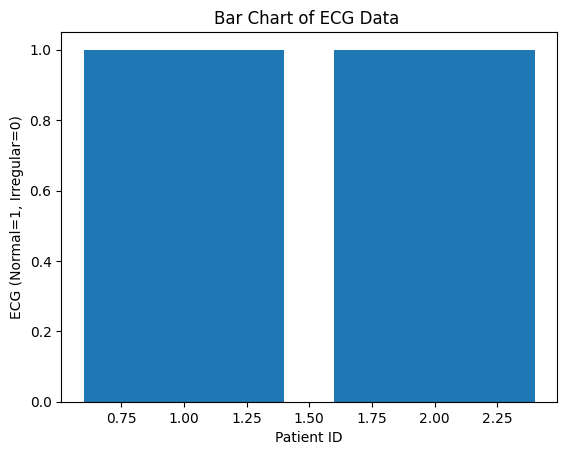

In [36]:
plt.bar(Input_data['Patient ID'],Input_data['ECG (Normal=1, Irregular=0)'])
plt.title("Bar Chart of ECG Data ")
plt.xlabel('Patient ID')
plt.ylabel('ECG (Normal=1, Irregular=0)')
plt.show()

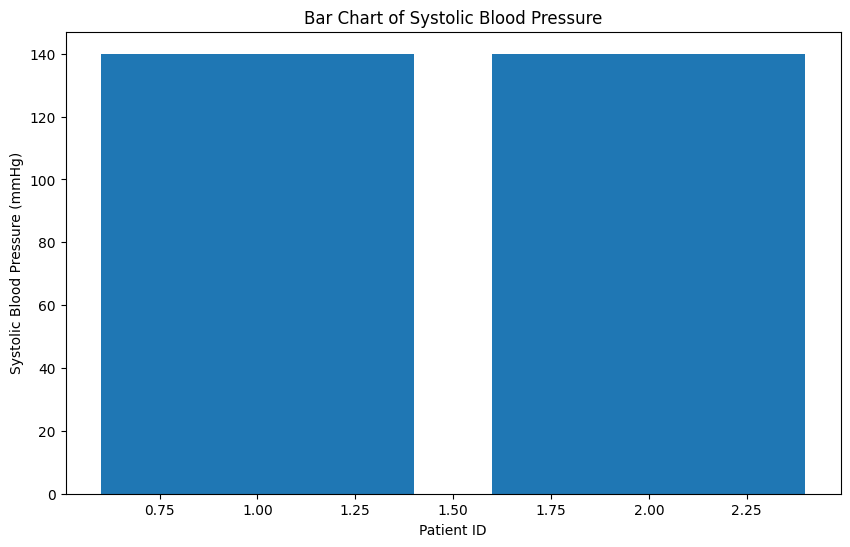

In [37]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(Input_data))

plt.bar(Input_data['Patient ID'], Input_data['Systolic'])
plt.title("Bar Chart of Systolic Blood Pressure")
plt.xlabel('Patient ID')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

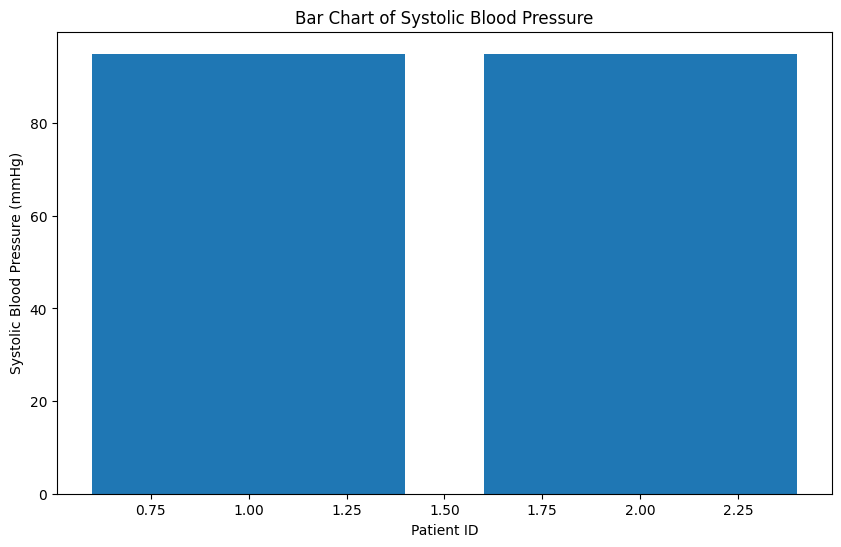

In [38]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(Input_data))

plt.bar(Input_data['Patient ID'], Input_data['Diastolic'])
plt.title("Bar Chart of Systolic Blood Pressure")
plt.xlabel('Patient ID')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.show()

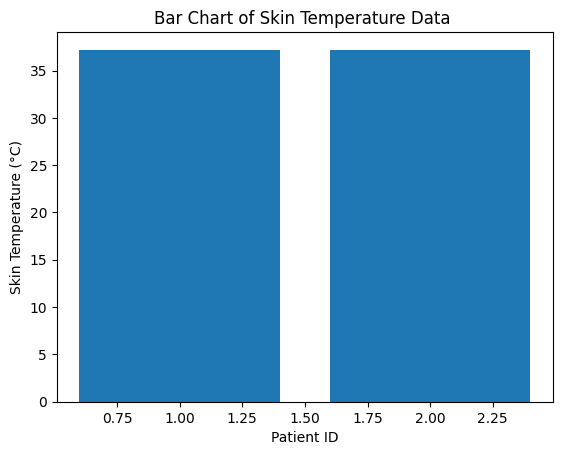

In [39]:
plt.bar(Input_data['Patient ID'],Input_data['Skin Temperature (°C)'])
plt.title("Bar Chart of Skin Temperature Data ")
plt.xlabel('Patient ID')
plt.ylabel('Skin Temperature (°C)')
plt.show()

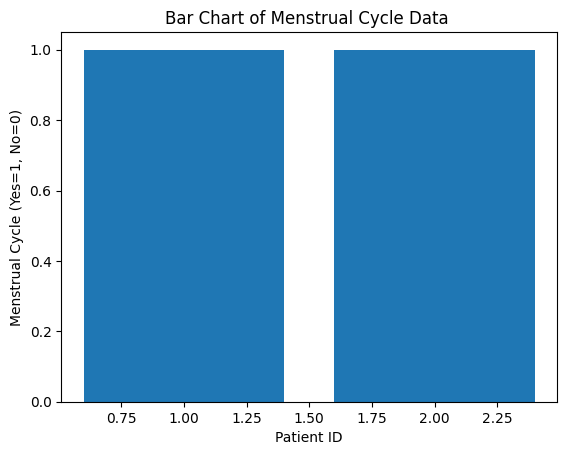

In [40]:
plt.bar(Input_data['Patient ID'],Input_data['Menstrual Cycle (Yes=1, No=0)'])
plt.title("Bar Chart of Menstrual Cycle Data ")
plt.xlabel('Patient ID')
plt.ylabel('Menstrual Cycle (Yes=1, No=0)')
plt.show()

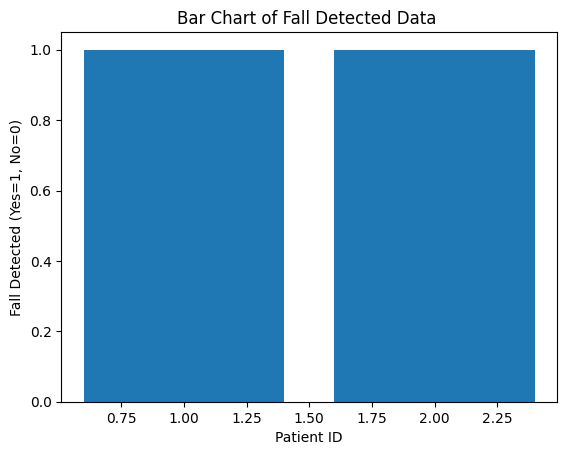

In [41]:
plt.bar(Input_data['Patient ID'],Input_data['Fall Detected (Yes=1, No=0)'])
plt.title("Bar Chart of Fall Detected Data ")
plt.xlabel('Patient ID')
plt.ylabel('Fall Detected (Yes=1, No=0)')
plt.show()

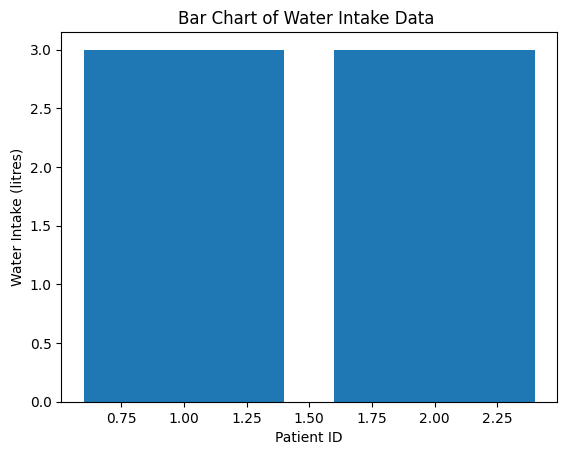

In [42]:
plt.bar(Input_data['Patient ID'],Input_data['Water Intake (litres)'])
plt.title("Bar Chart of Water Intake Data ")
plt.xlabel('Patient ID')
plt.ylabel('Water Intake (litres)')
plt.show()

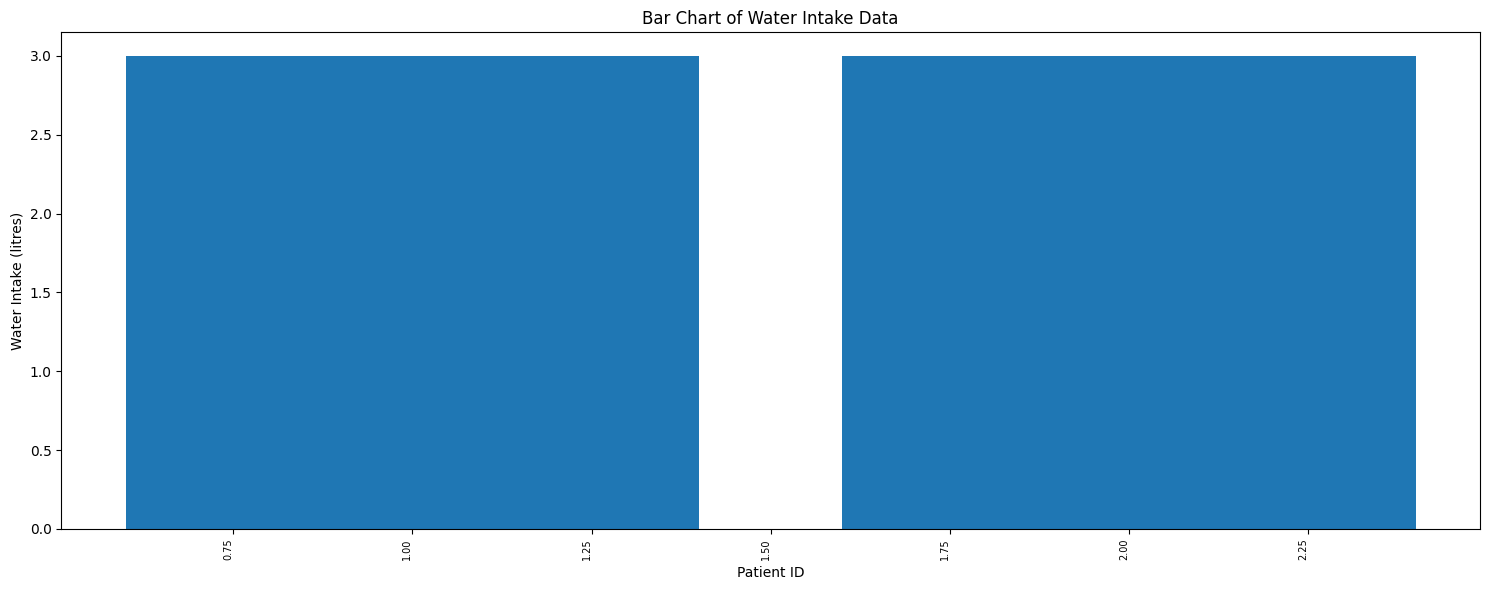

In [43]:
# Increase figure size (width, height) to expand x-axis
plt.figure(figsize=(15, 6))  # Adjust width (15) as needed for clarity

# Create bar plot
plt.bar(Input_data['Patient ID'], Input_data['Water Intake (litres)'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=7)  # Rotate 45 degrees, align right, smaller font

# Add labels and title
plt.title("Bar Chart of Water Intake Data")
plt.xlabel('Patient ID')
plt.ylabel('Water Intake (litres)')

# Tight layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

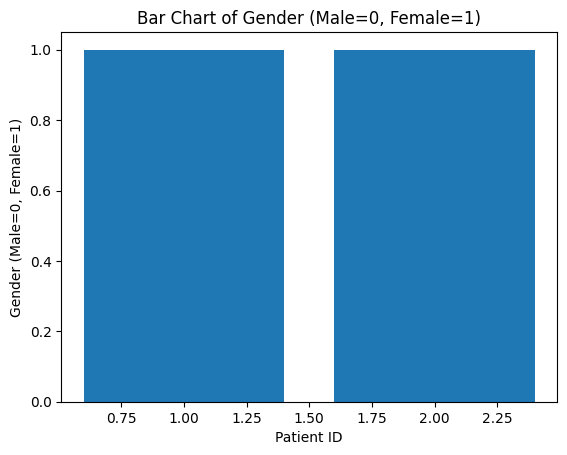

In [44]:
plt.bar(Input_data['Patient ID'], Input_data['Gender (Male=0, Female=1)'])
plt.title("Bar Chart of Gender (Male=0, Female=1)")
plt.xlabel('Patient ID')
plt.ylabel('Gender (Male=0, Female=1)')
plt.show()

## **Histogram Plot**

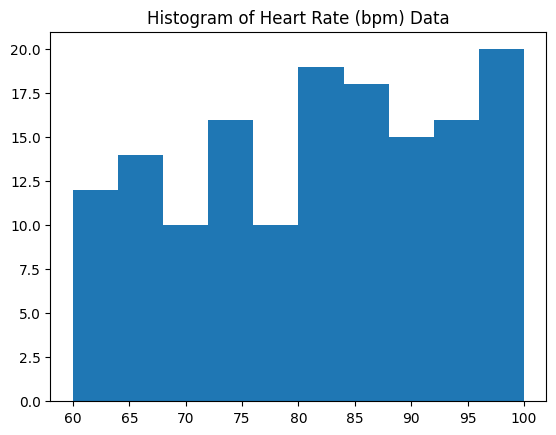

In [45]:
plt.hist(Input_data['Heart Rate (bpm)'])
plt.title("Histogram of Heart Rate (bpm) Data")
plt.show()

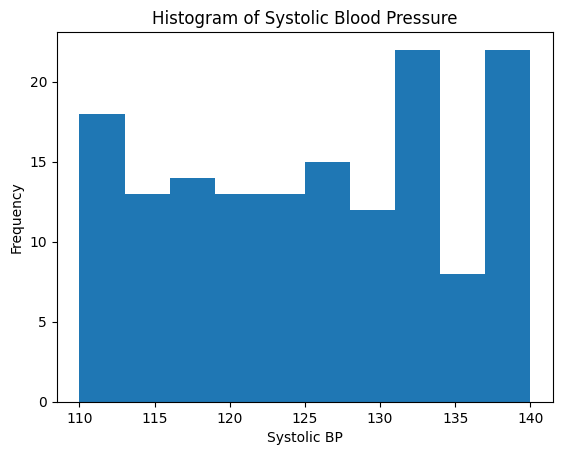

In [46]:
plt.hist(Input_data['Systolic'])
plt.title("Histogram of Systolic Blood Pressure")
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.show()

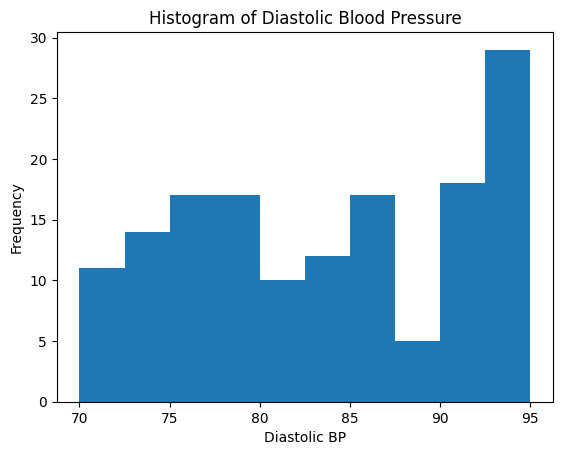

In [47]:
plt.hist(Input_data['Diastolic'])
plt.title("Histogram of Diastolic Blood Pressure")
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.show()

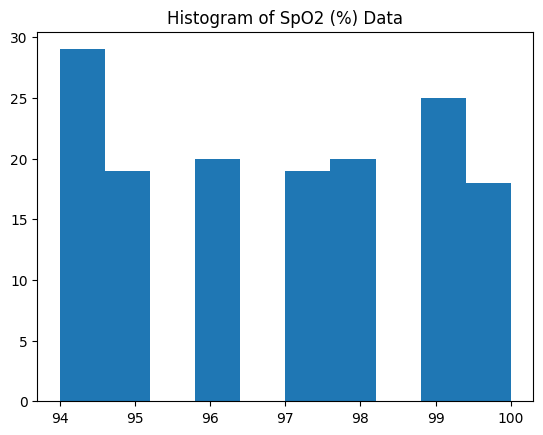

In [48]:
plt.hist(Input_data['SpO2 (%)'])
plt.title("Histogram of SpO2 (%) Data")
plt.show()

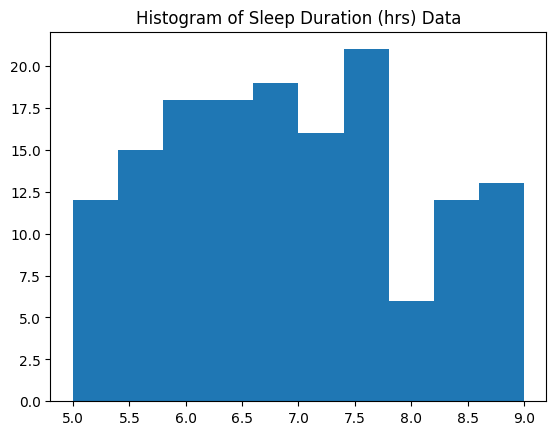

In [49]:
plt.hist(Input_data['Sleep Duration (hrs)'])
plt.title("Histogram of Sleep Duration (hrs) Data")
plt.show()

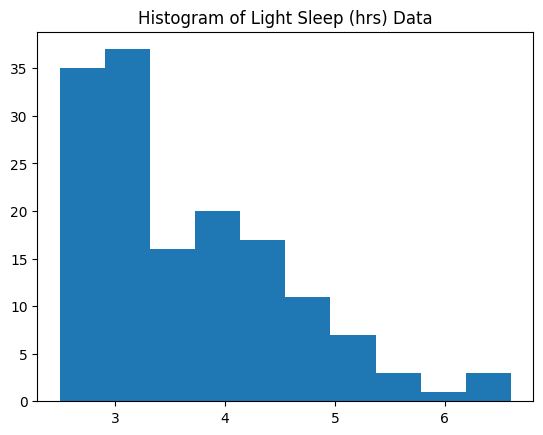

In [50]:
plt.hist(Input_data['Light Sleep (hrs)'])
plt.title("Histogram of Light Sleep (hrs) Data")
plt.show()

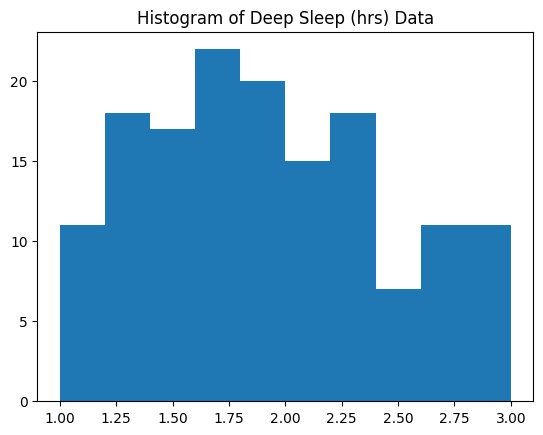

In [51]:
plt.hist(Input_data['Deep Sleep (hrs)'])
plt.title("Histogram of Deep Sleep (hrs) Data")
plt.show()

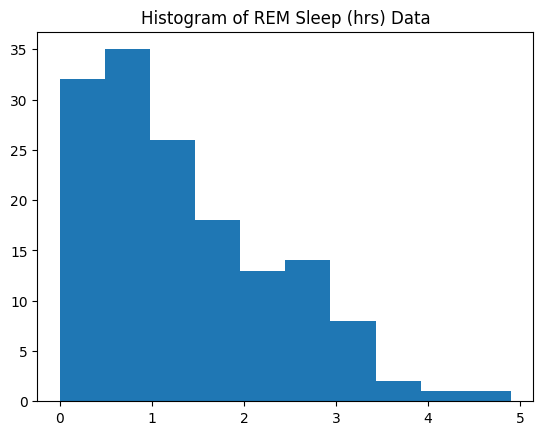

In [52]:
plt.hist(Input_data['REM Sleep (hrs)'])
plt.title("Histogram of REM Sleep (hrs) Data")
plt.show()

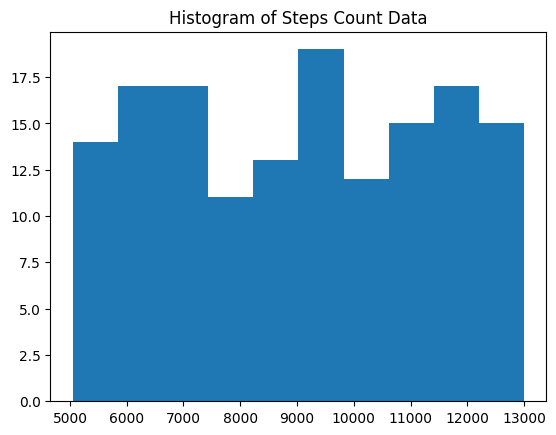

In [53]:
plt.hist(Input_data['Steps Count'])
plt.title("Histogram of Steps Count Data")
plt.show()

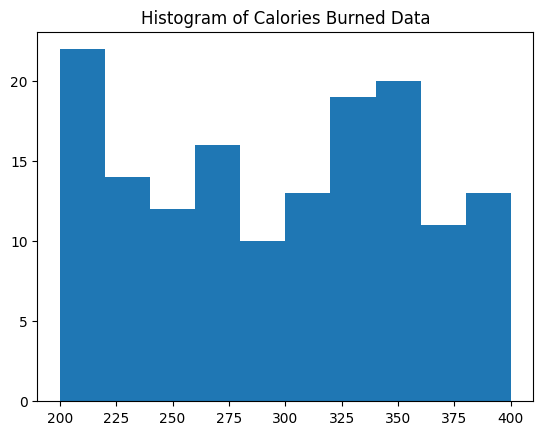

In [54]:
plt.hist(Input_data['Calories Burned'])
plt.title("Histogram of Calories Burned Data")
plt.show()

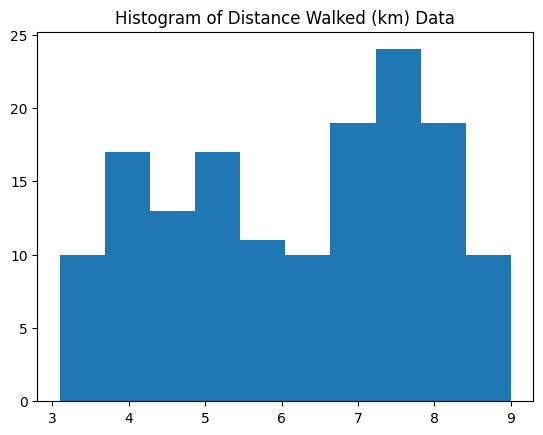

In [55]:
plt.hist(Input_data['Distance Walked (km)'])
plt.title("Histogram of Distance Walked (km) Data")
plt.show()

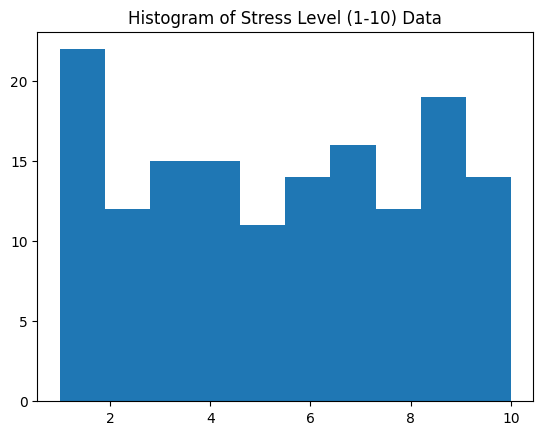

In [56]:
plt.hist(Input_data['Stress Level (1-10)'])
plt.title("Histogram of Stress Level (1-10) Data")
plt.show()

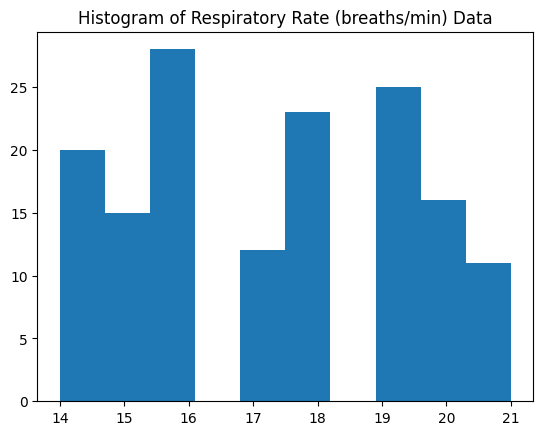

In [57]:
plt.hist(Input_data['Respiratory Rate (breaths/min)'])
plt.title("Histogram of Respiratory Rate (breaths/min) Data")
plt.show()

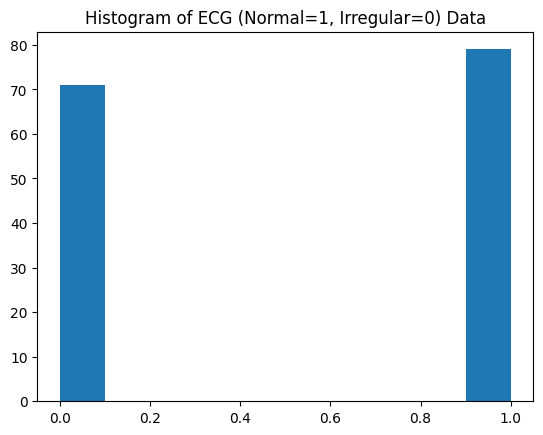

In [58]:
plt.hist(Input_data['ECG (Normal=1, Irregular=0)'])
plt.title("Histogram of ECG (Normal=1, Irregular=0) Data")
plt.show()

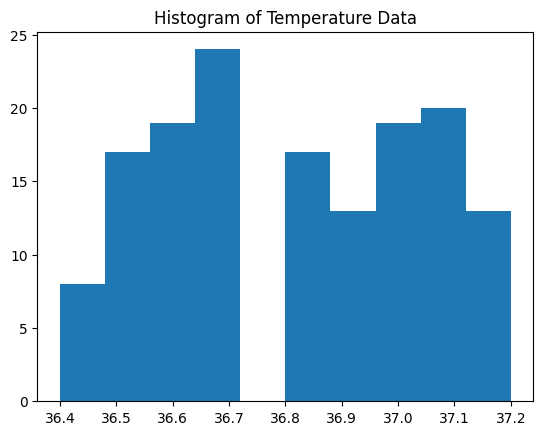

In [59]:
plt.hist(Input_data['Skin Temperature (°C)'])
plt.title("Histogram of Temperature Data")
plt.show()

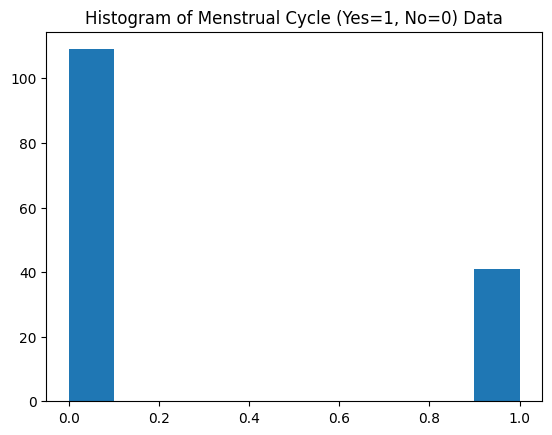

In [60]:
plt.hist(Input_data['Menstrual Cycle (Yes=1, No=0)'])
plt.title("Histogram of Menstrual Cycle (Yes=1, No=0) Data")
plt.show()

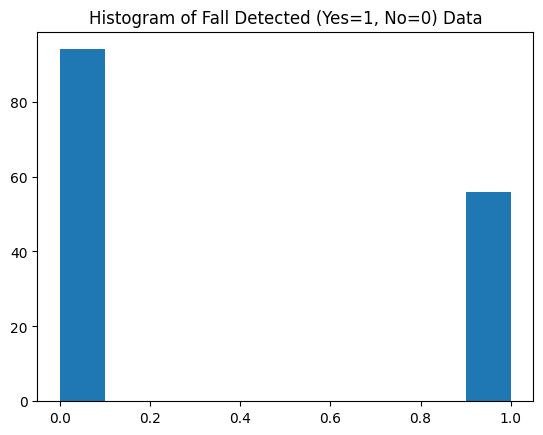

In [61]:
plt.hist(Input_data['Fall Detected (Yes=1, No=0)'])
plt.title("Histogram of Fall Detected (Yes=1, No=0) Data")
plt.show()

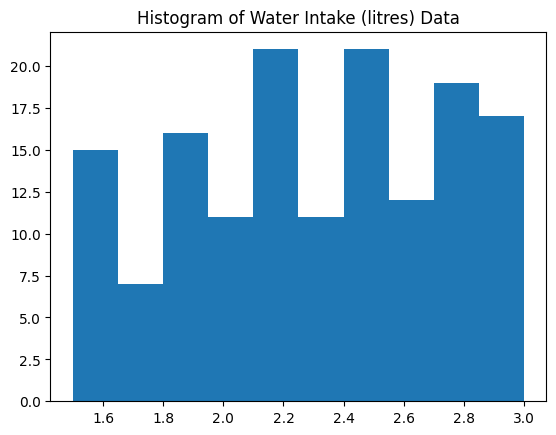

In [62]:
plt.hist(Input_data['Water Intake (litres)'])
plt.title("Histogram of Water Intake (litres) Data")
plt.show()

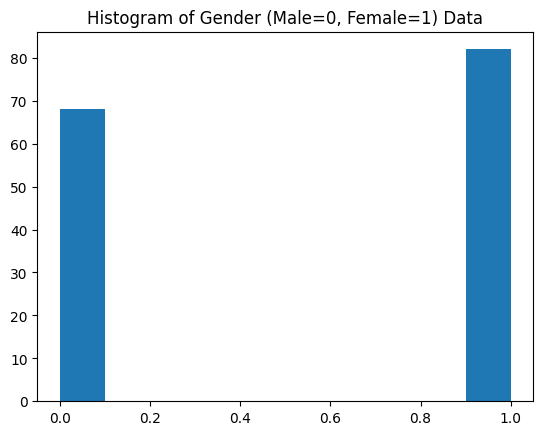

In [64]:
plt.hist(Input_data['Gender (Male=0, Female=1)'])
plt.title("Histogram of Gender (Male=0, Female=1) Data")
plt.show()

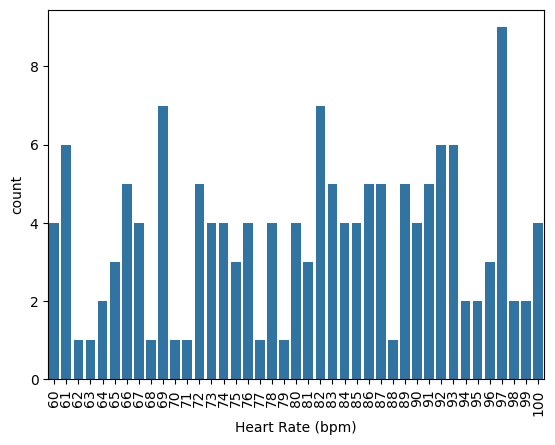

In [65]:
sns.countplot(x='Heart Rate (bpm)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


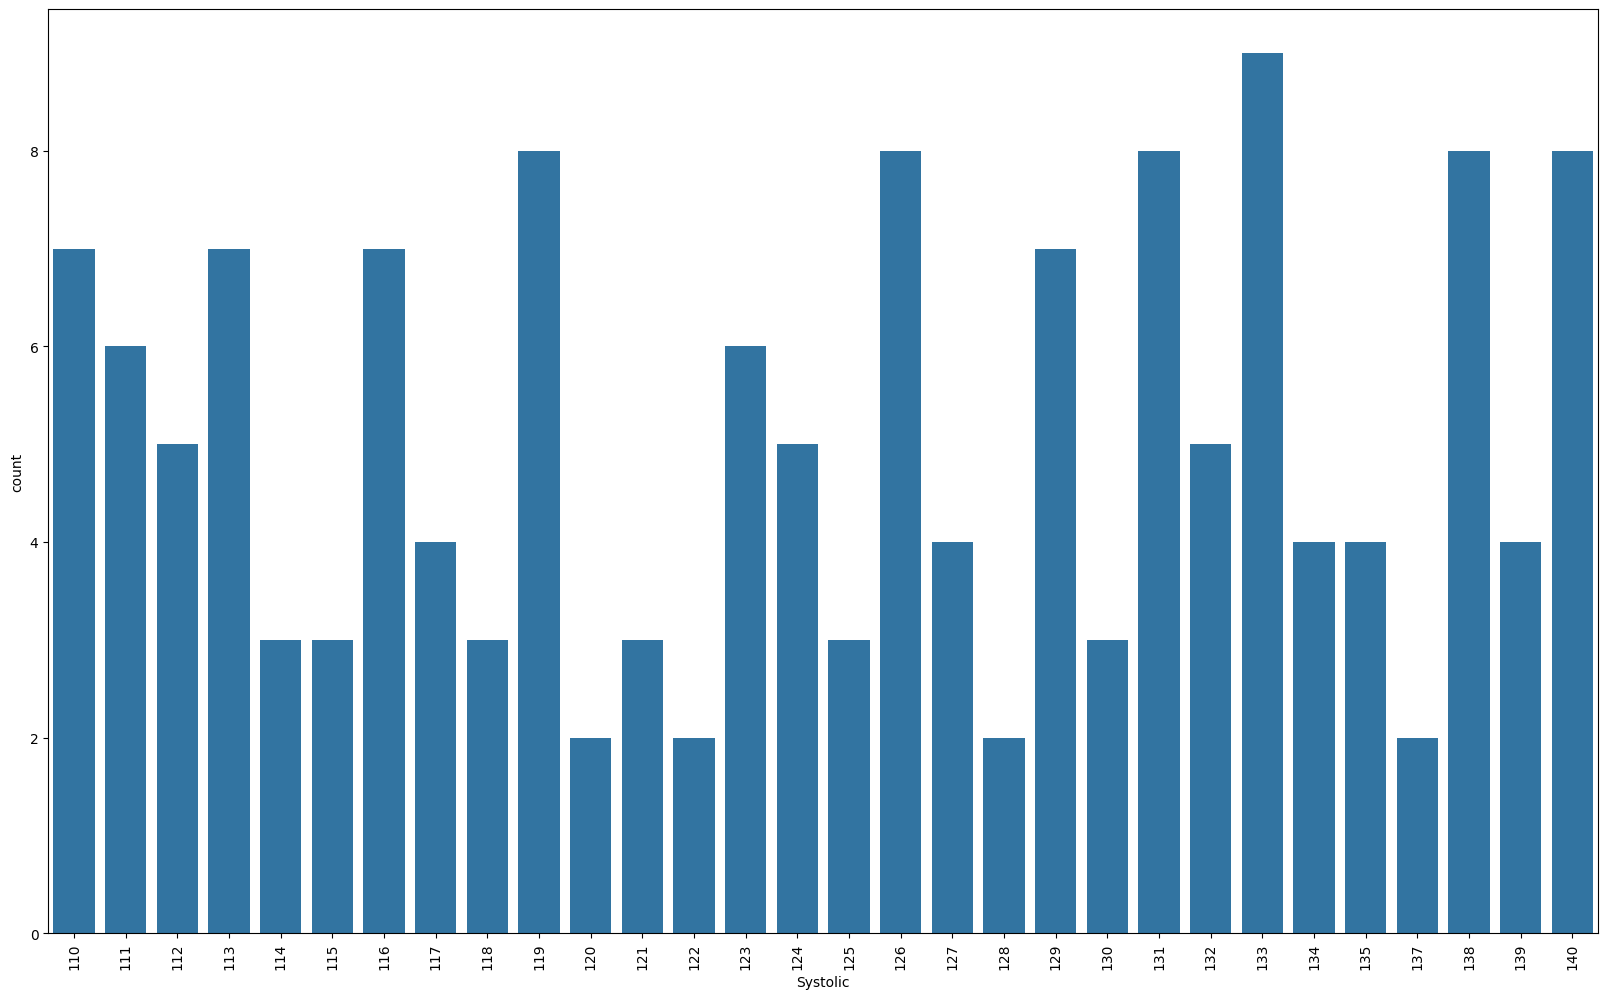

In [66]:
# Set figure size (width, height)
plt.figure(figsize=(20, 12))

# Create countplot
sns.countplot(x='Systolic', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

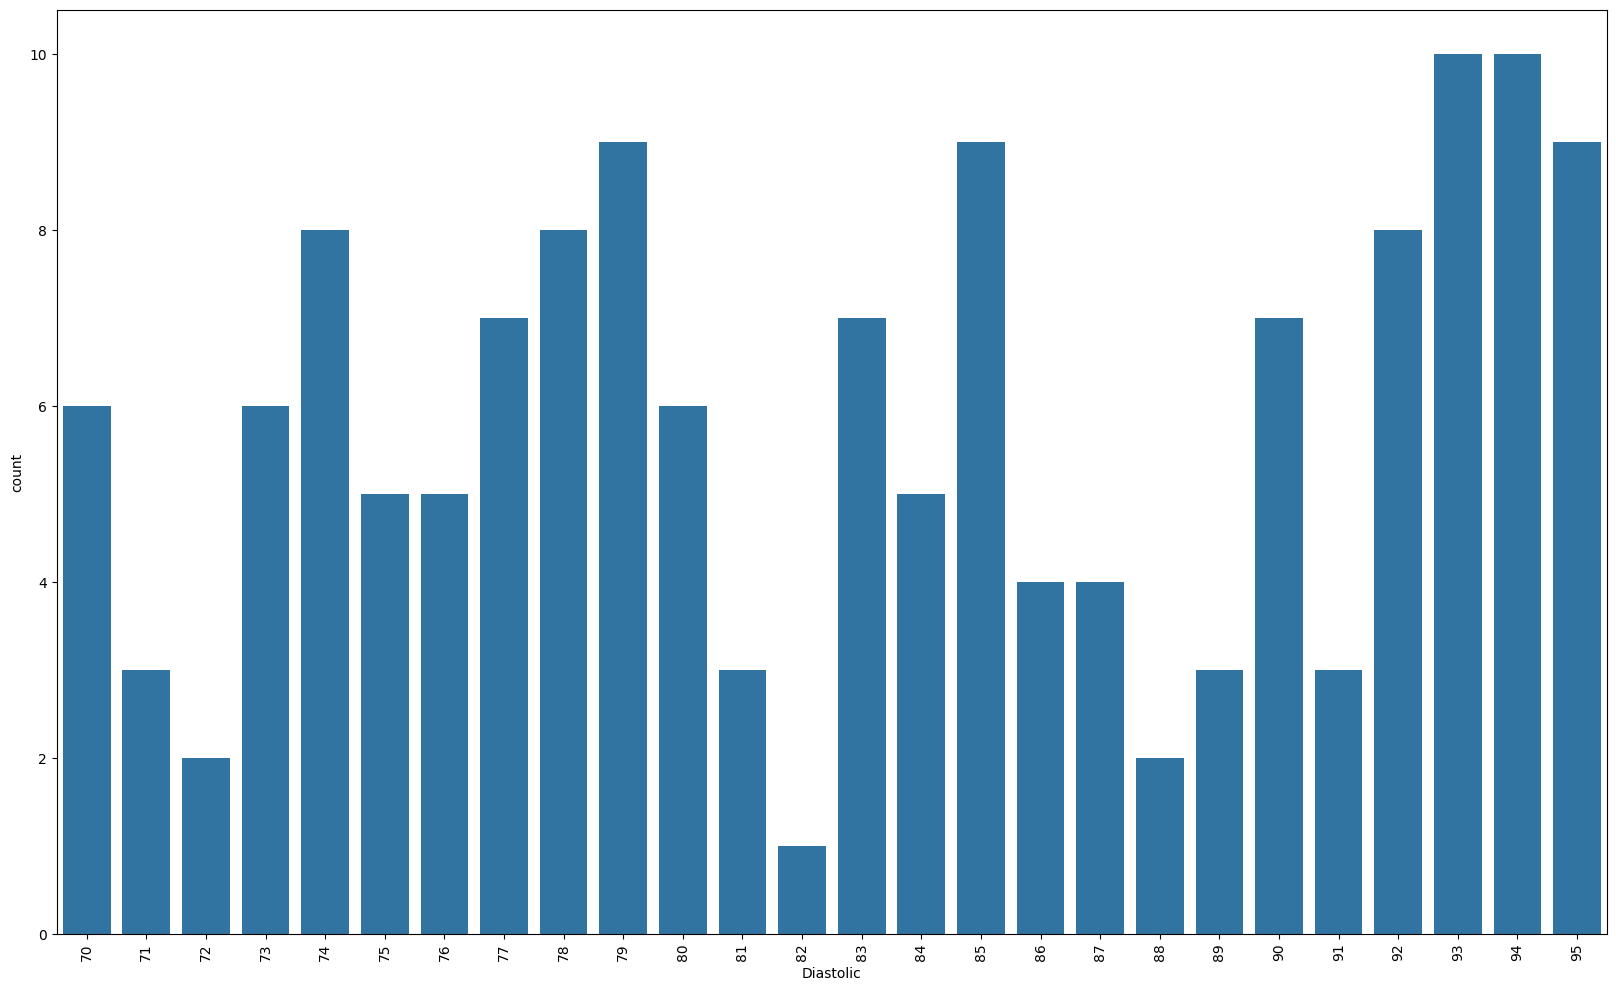

In [67]:
# Set figure size (width, height)
plt.figure(figsize=(20, 12))

# Create countplot
sns.countplot(x='Diastolic', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

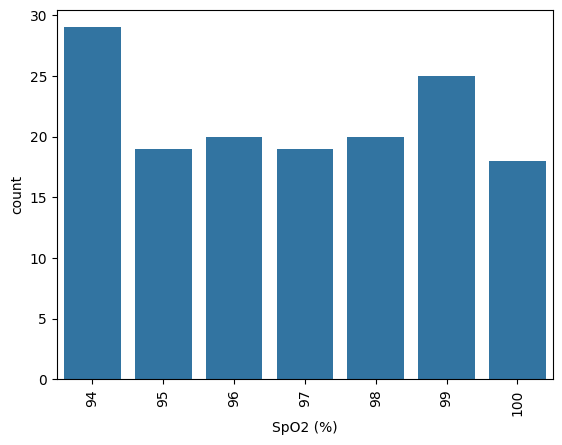

In [68]:
sns.countplot(x='SpO2 (%)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


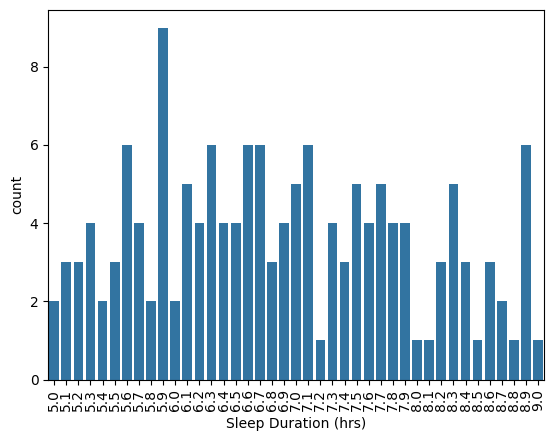

In [69]:
sns.countplot(x='Sleep Duration (hrs)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


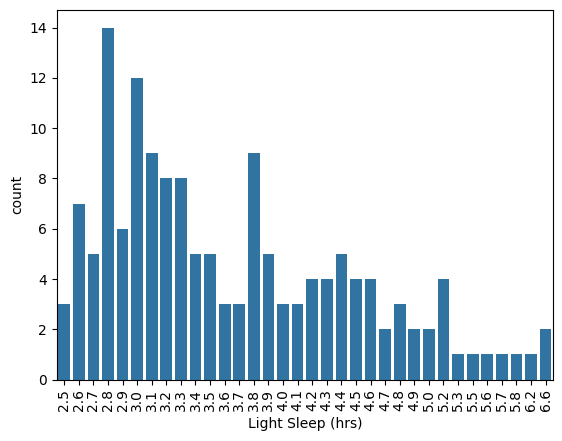

In [70]:
sns.countplot(x='Light Sleep (hrs)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


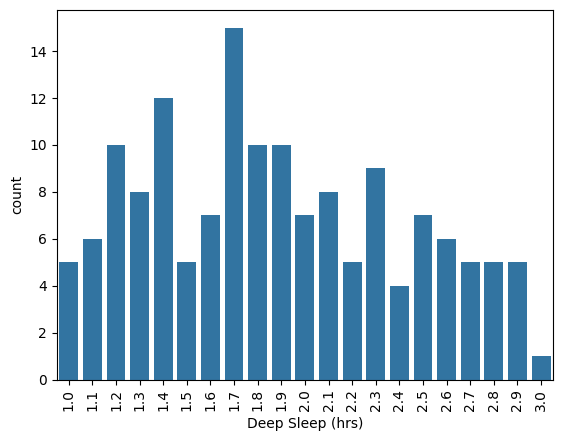

In [71]:
sns.countplot(x='Deep Sleep (hrs)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


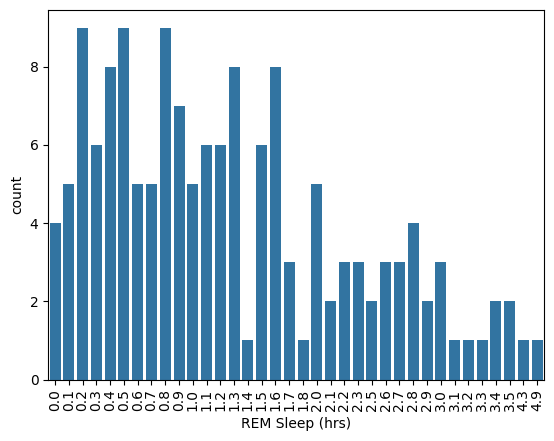

In [72]:
sns.countplot(x='REM Sleep (hrs)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


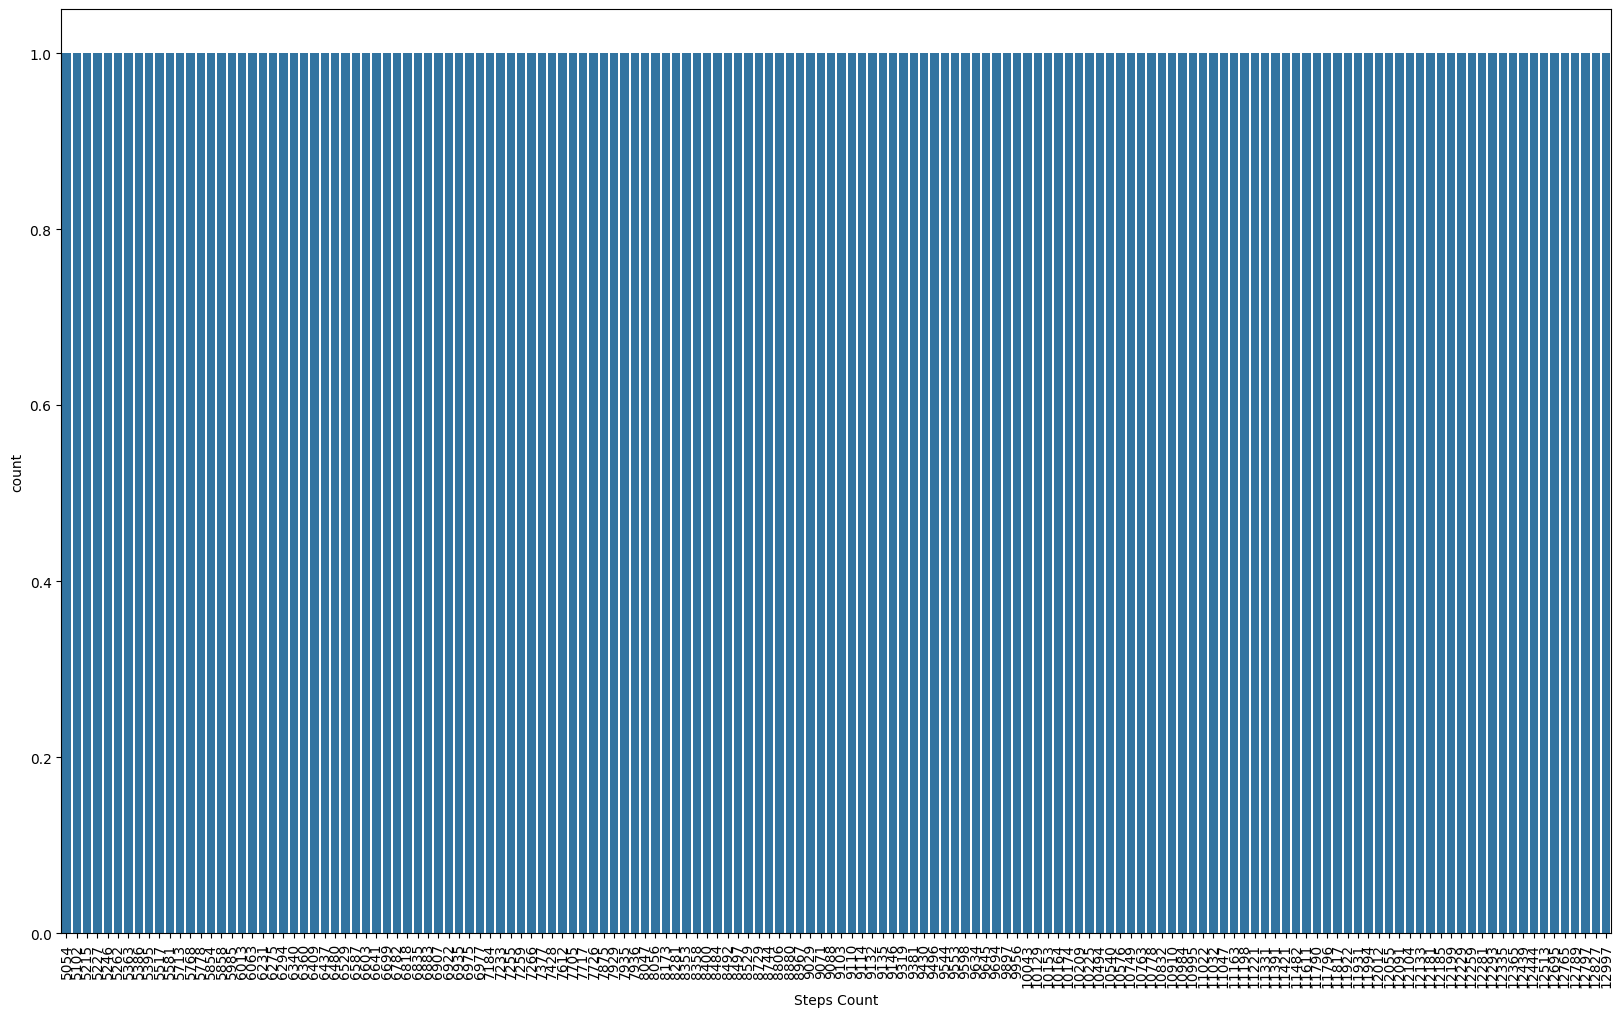

In [73]:
# Set figure size (width, height)
plt.figure(figsize=(20, 12))

# Create countplot
sns.countplot(x='Steps Count', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

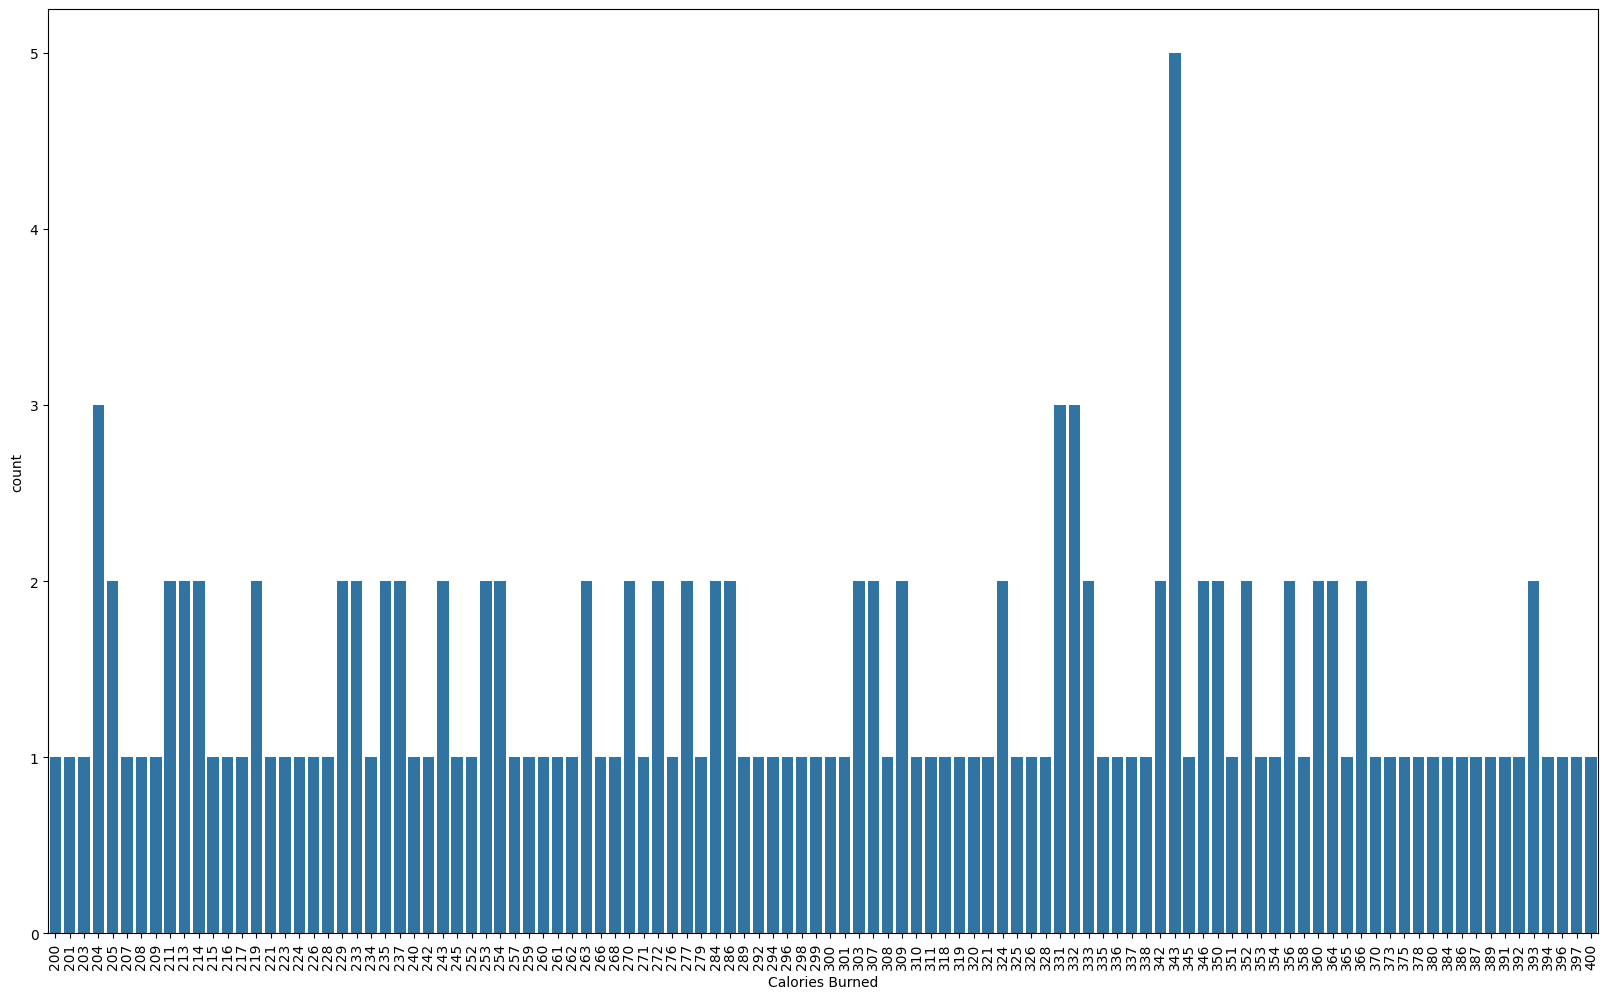

In [74]:
# Set figure size (width, height)
plt.figure(figsize=(20, 12))

# Create countplot
sns.countplot(x='Calories Burned', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=10)

# Show plot
plt.show()

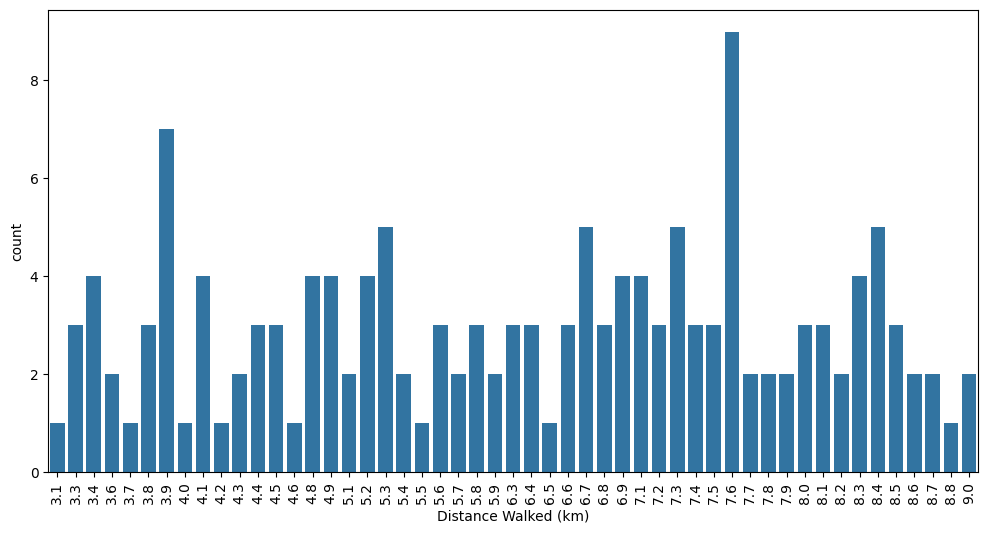

In [75]:
# Set figure size (width, height)
plt.figure(figsize=(12, 6))

# Create countplot
sns.countplot(x='Distance Walked (km)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show plot
plt.show()

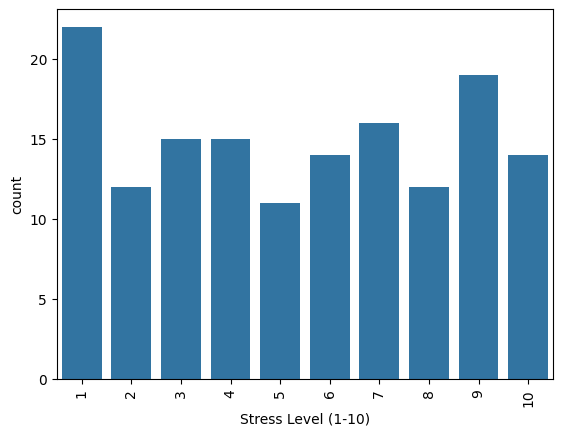

In [76]:
sns.countplot(x='Stress Level (1-10)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


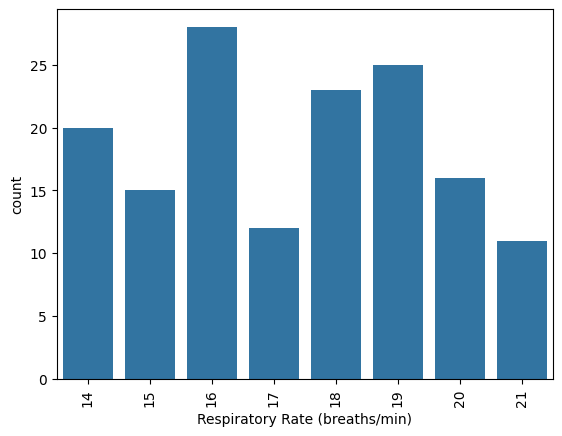

In [77]:
sns.countplot(x='Respiratory Rate (breaths/min)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


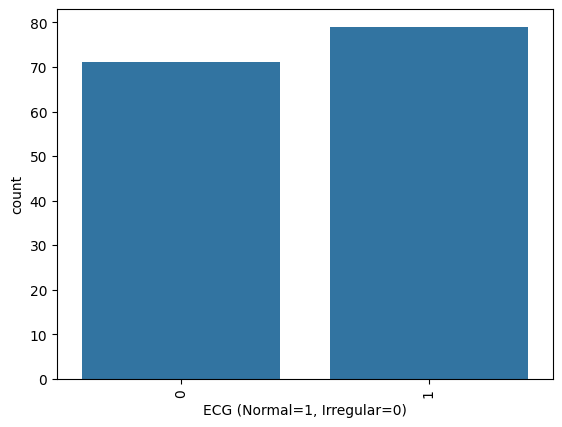

In [78]:
sns.countplot(x='ECG (Normal=1, Irregular=0)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


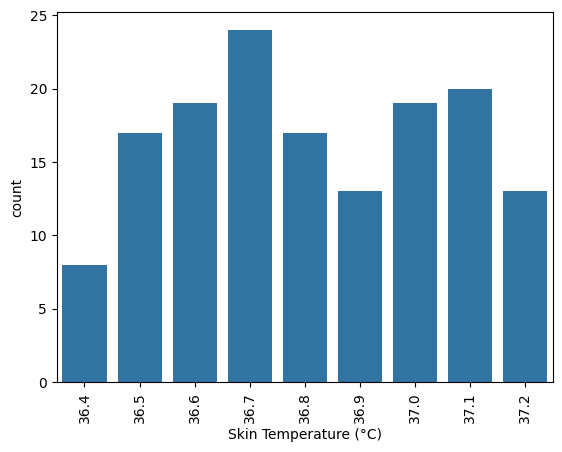

In [79]:
sns.countplot(x='Skin Temperature (°C)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


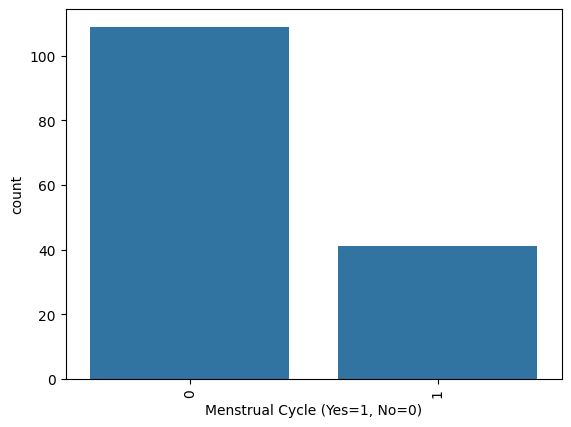

In [80]:
sns.countplot(x='Menstrual Cycle (Yes=1, No=0)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


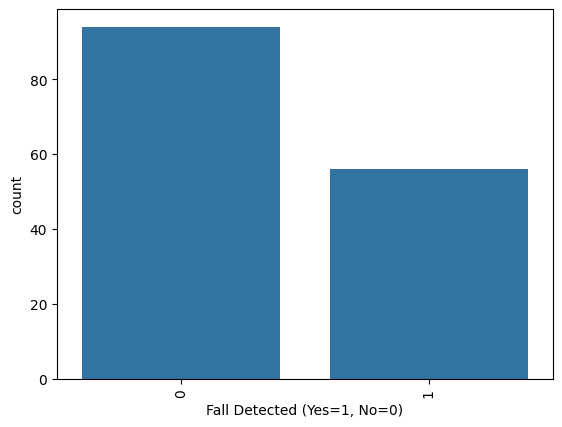

In [81]:
sns.countplot(x='Fall Detected (Yes=1, No=0)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


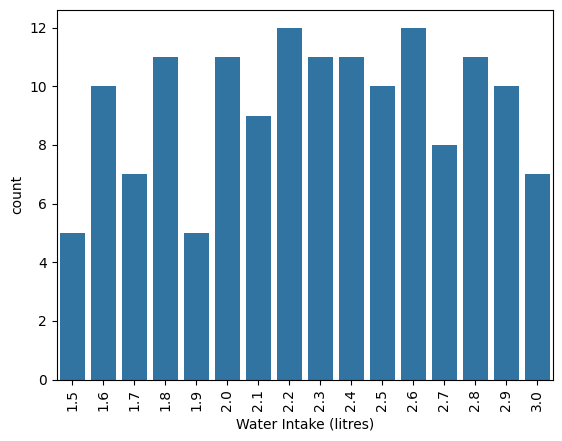

In [82]:
sns.countplot(x='Water Intake (litres)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()


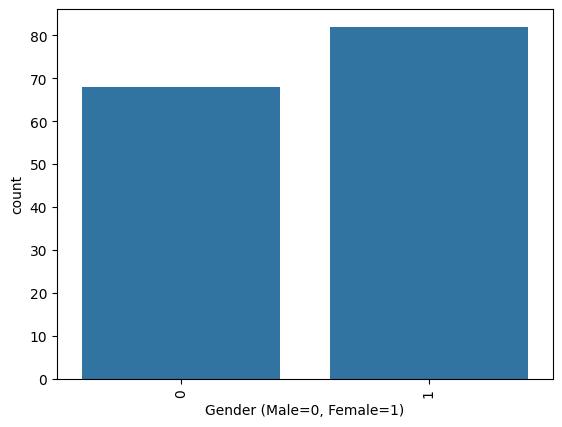

In [86]:
sns.countplot(x='Gender (Male=0, Female=1)', data=Input_data)

# Rotate x-axis labels
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='Patient ID', ylabel='Density'>

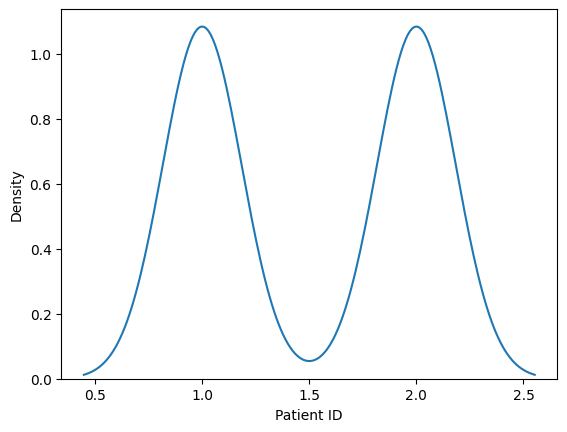

In [87]:
sns.kdeplot(Input_data['Patient ID'])

<Axes: xlabel='Heart Rate (bpm)', ylabel='Density'>

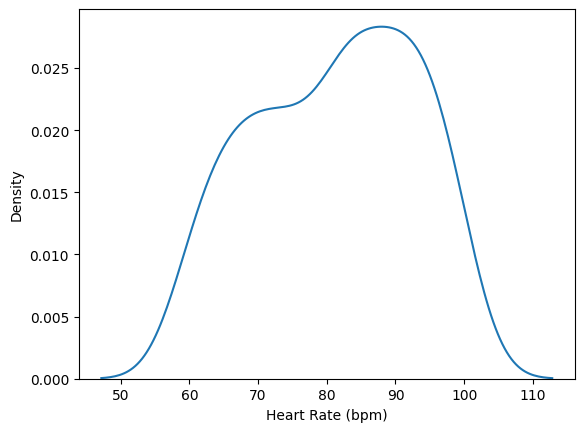

In [88]:
sns.kdeplot(Input_data['Heart Rate (bpm)'])

<Axes: xlabel='Systolic', ylabel='Density'>

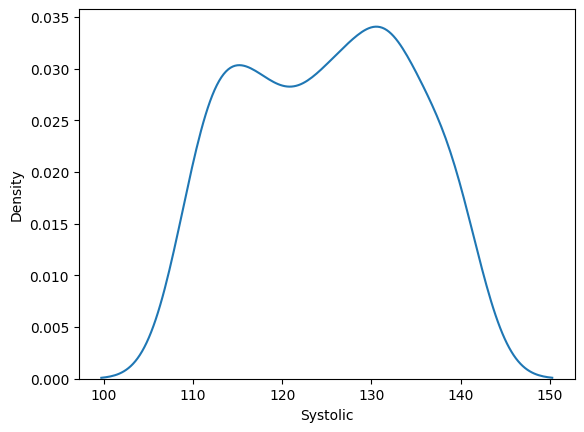

In [89]:
sns.kdeplot(Input_data['Systolic'])

<Axes: xlabel='Diastolic', ylabel='Density'>

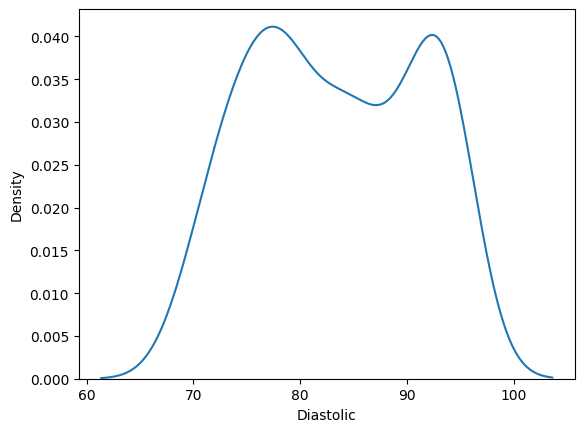

In [90]:
sns.kdeplot(Input_data['Diastolic'])

<Axes: xlabel='SpO2 (%)', ylabel='Density'>

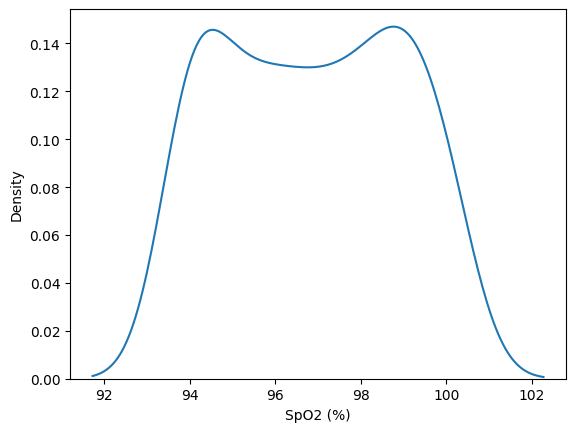

In [91]:
sns.kdeplot(Input_data['SpO2 (%)'])

<Axes: xlabel='Sleep Duration (hrs)', ylabel='Density'>

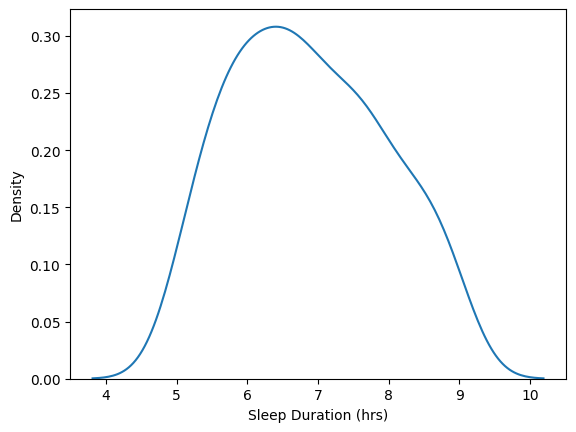

In [92]:
sns.kdeplot(Input_data['Sleep Duration (hrs)'])

<Axes: xlabel='Light Sleep (hrs)', ylabel='Density'>

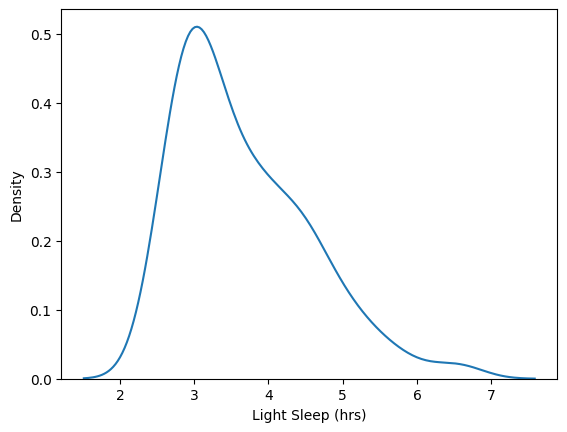

In [93]:
sns.kdeplot(Input_data['Light Sleep (hrs)'])

<Axes: xlabel='Deep Sleep (hrs)', ylabel='Density'>

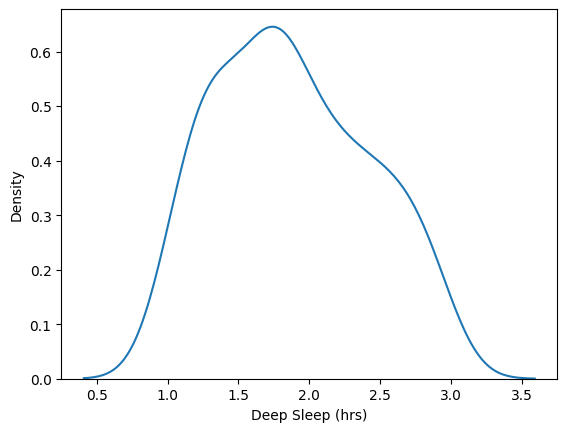

In [94]:
sns.kdeplot(Input_data['Deep Sleep (hrs)'])

<Axes: xlabel='REM Sleep (hrs)', ylabel='Density'>

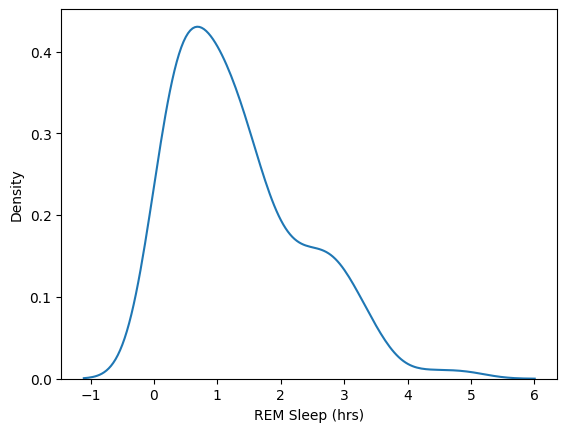

In [95]:
sns.kdeplot(Input_data['REM Sleep (hrs)'])

<Axes: xlabel='Steps Count', ylabel='Density'>

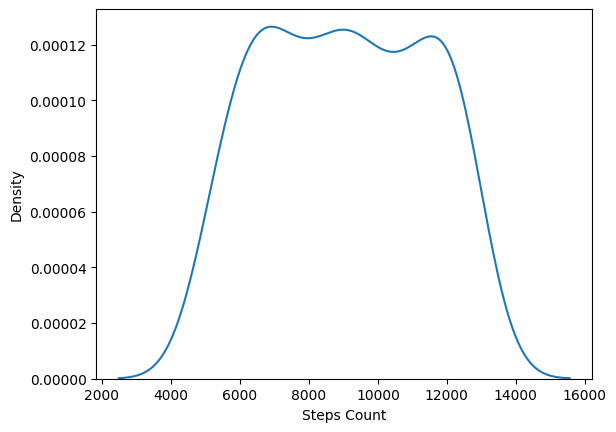

In [96]:
sns.kdeplot(Input_data['Steps Count'])

<Axes: xlabel='Calories Burned', ylabel='Density'>

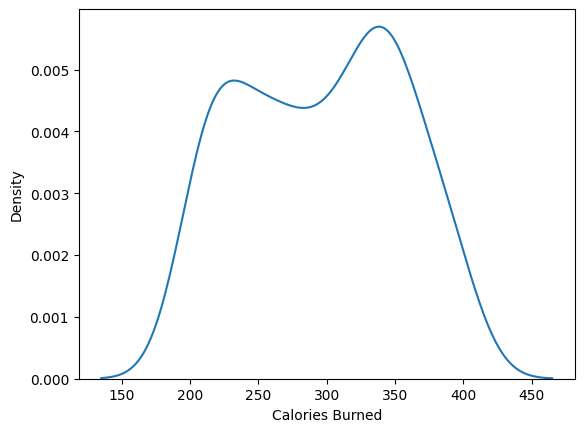

In [97]:
sns.kdeplot(Input_data['Calories Burned'])

<Axes: xlabel='Distance Walked (km)', ylabel='Density'>

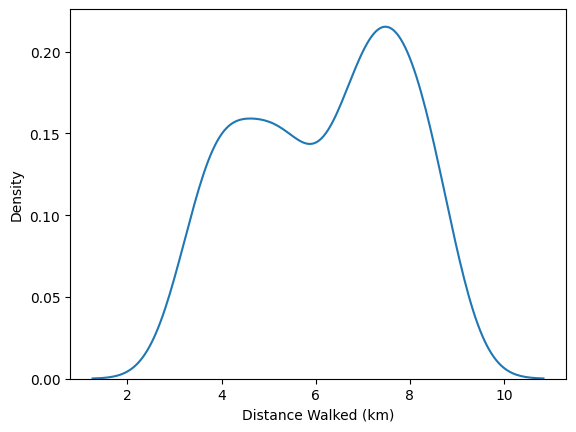

In [98]:
sns.kdeplot(Input_data['Distance Walked (km)'])

<Axes: xlabel='Stress Level (1-10)', ylabel='Density'>

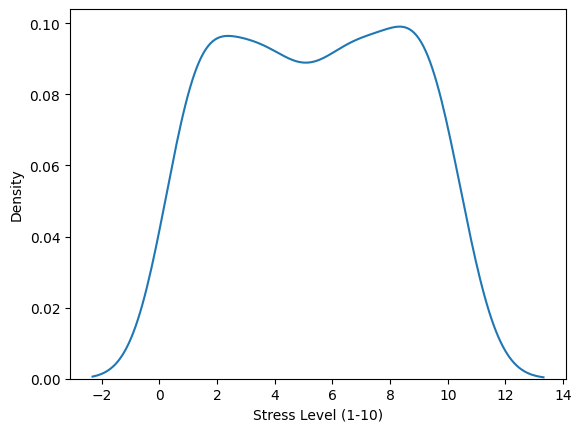

In [99]:
sns.kdeplot(Input_data['Stress Level (1-10)'])

<Axes: xlabel='Respiratory Rate (breaths/min)', ylabel='Density'>

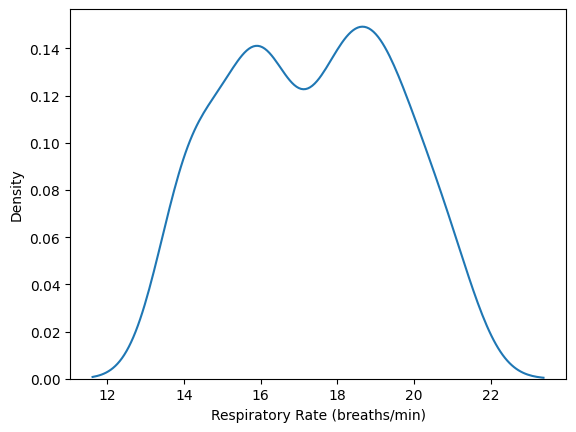

In [100]:
sns.kdeplot(Input_data['Respiratory Rate (breaths/min)'])

<Axes: xlabel='ECG (Normal=1, Irregular=0)', ylabel='Density'>

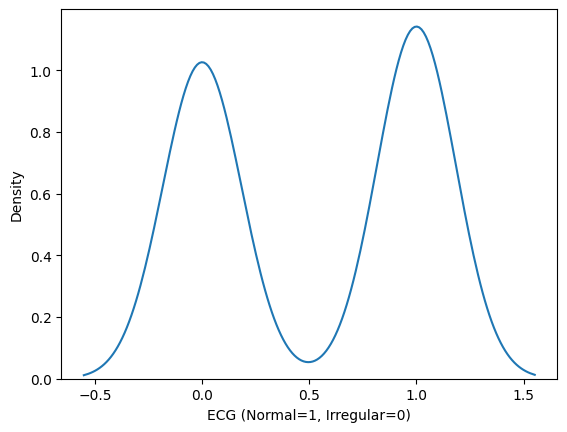

In [101]:
sns.kdeplot(Input_data['ECG (Normal=1, Irregular=0)'])


<Axes: xlabel='Systolic', ylabel='Density'>

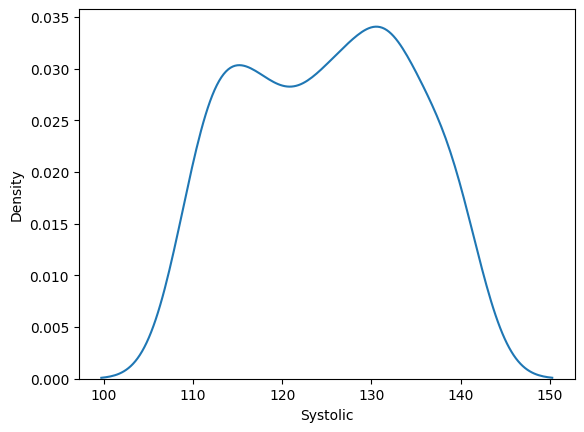

In [102]:
sns.kdeplot(Input_data['Systolic'])


<Axes: xlabel='Diastolic', ylabel='Density'>

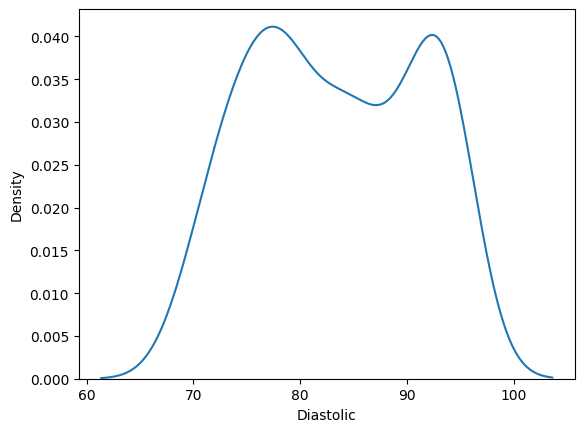

In [103]:
sns.kdeplot(Input_data['Diastolic'])

<Axes: xlabel='Skin Temperature (°C)', ylabel='Density'>

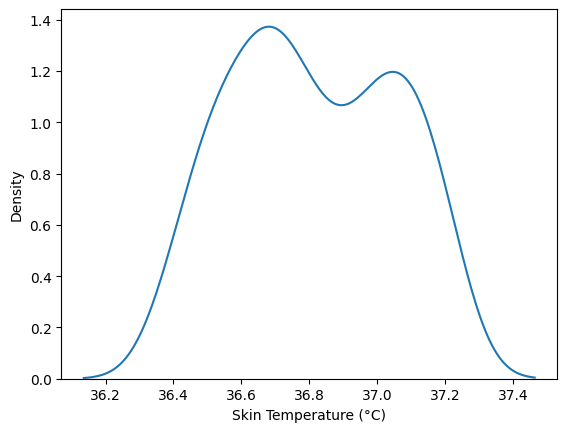

In [104]:
sns.kdeplot(Input_data['Skin Temperature (°C)'])


<Axes: xlabel='Menstrual Cycle (Yes=1, No=0)', ylabel='Density'>

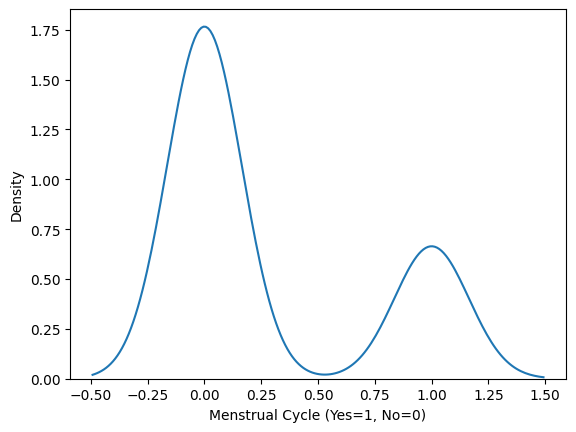

In [105]:
sns.kdeplot(Input_data['Menstrual Cycle (Yes=1, No=0)'])


<Axes: xlabel='Fall Detected (Yes=1, No=0)', ylabel='Density'>

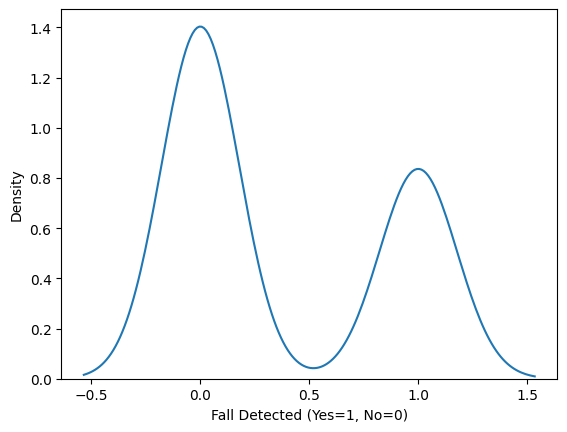

In [106]:
sns.kdeplot(Input_data['Fall Detected (Yes=1, No=0)'])


<Axes: xlabel='Water Intake (litres)', ylabel='Density'>

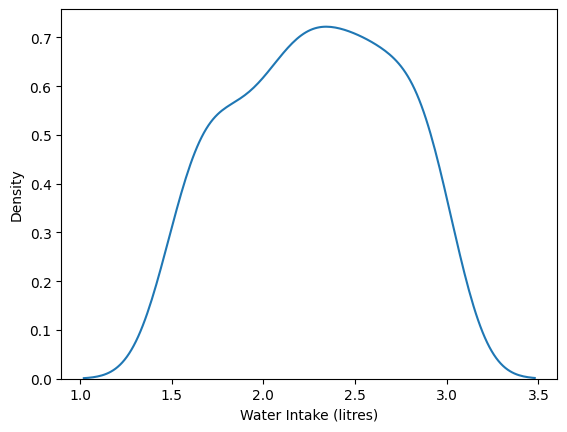

In [107]:
sns.kdeplot(Input_data['Water Intake (litres)'])


<Axes: xlabel='Gender (Male=0, Female=1)', ylabel='Density'>

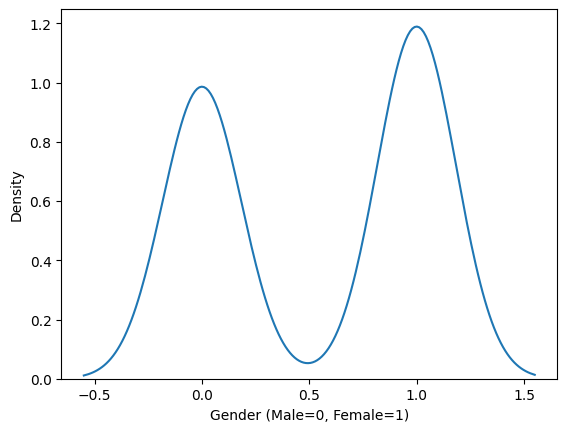

In [109]:
sns.kdeplot(Input_data['Gender (Male=0, Female=1)'])

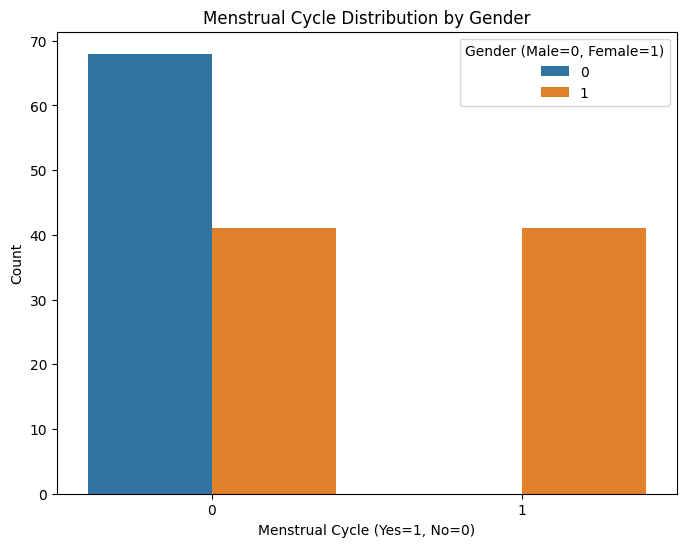

In [110]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Menstrual Cycle (Yes=1, No=0)', hue='Gender (Male=0, Female=1)', data=Input_data)
plt.title("Menstrual Cycle Distribution by Gender")
plt.xlabel('Menstrual Cycle (Yes=1, No=0)')
plt.ylabel('Count')
plt.show()

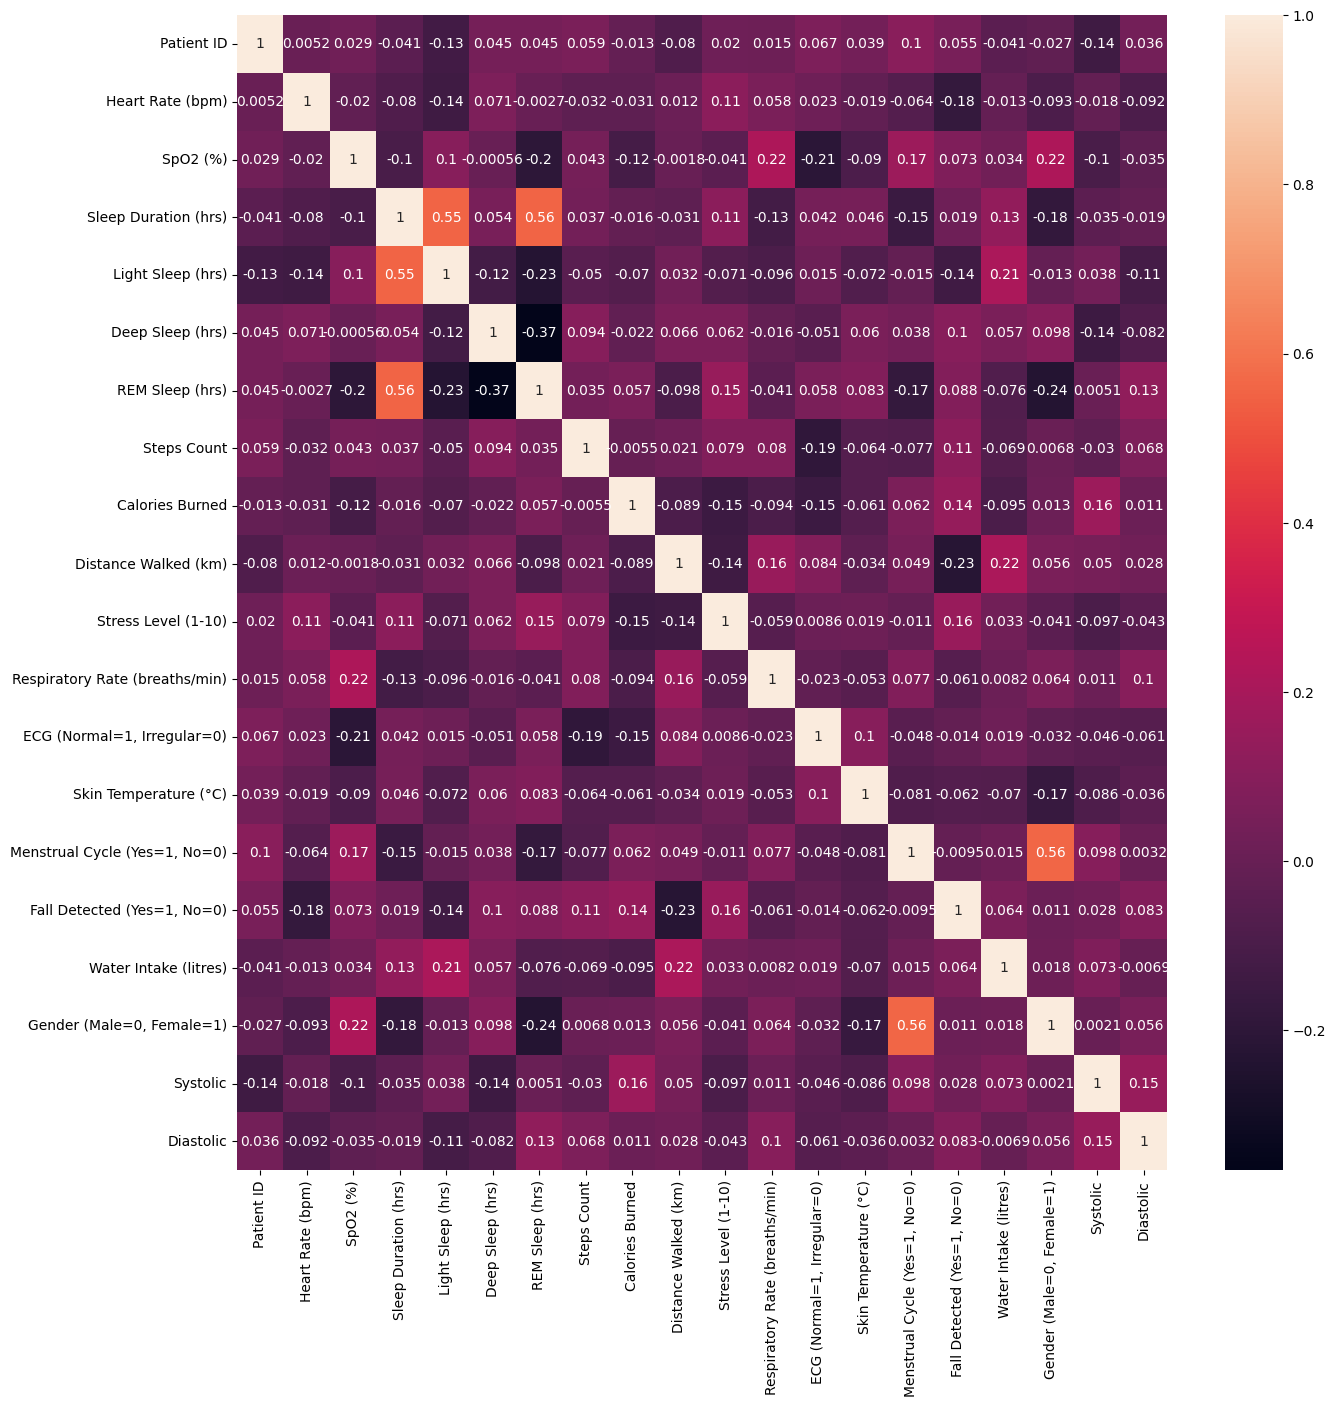

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = Input_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = numeric_data.corr()

# Plot heatmap
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()


# **Model Implementation**

In [112]:
features =['Heart Rate (bpm)', 'Systolic', 'Diastolic', 'SpO2 (%)', 'Steps Count', 'Stress Level (1-10)', 'ECG (Normal=1, Irregular=0)', 'Gender (Male=0, Female=1)']
X = Input_data[features]
X

,Heart Rate (bpm),Systolic,Diastolic,SpO2 (%),Steps Count,Stress Level (1-10),"ECG (Normal=1, Irregular=0)","Gender (Male=0, Female=1)"
0,87,138,93,95,6922,8,1,0
1,88,138,79,100,6409,1,0,1
2,64,129,73,98,7705,4,0,0
3,81,125,70,99,10153,9,0,0
4,61,118,95,99,11796,2,0,0
...,...,...,...,...,...,...,...,...
145,82,116,79,98,12133,10,0,0
146,97,125,81,97,11032,2,0,0
147,62,113,70,100,5363,1,1,0
148,73,133,70,97,6883,1,1,0


In [113]:
Y = Input_data['Menstrual Cycle (Yes=1, No=0)']
Y

,"Menstrual Cycle (Yes=1, No=0)"
0,0
1,1
2,0
3,0
4,0
...,...
145,0
146,0
147,0
148,0


In [114]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 =  train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)

# **Naive Bayes Algorithm**

In [115]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_Algorithm = GaussianNB()
NB_Algorithm.fit(x_train1, y_train1)
NB_Algorithm_Prediction = NB_Algorithm.predict(x_test1)
Accuracy_NB = metrics.accuracy_score(y_test1, NB_Algorithm_Prediction)
print('Accuracy of Naive Bayes Algorithm', Accuracy_NB)

Accuracy of Naive Bayes Algorithm 0.6666666666666666


In [116]:
NB_Algorithm_Prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

# **Classification report and Confusion matrix of Naive Bayes Algorithm**

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        22
           1       0.44      1.00      0.62         8

    accuracy                           0.67        30
   macro avg       0.72      0.77      0.66        30
weighted avg       0.85      0.67      0.68        30



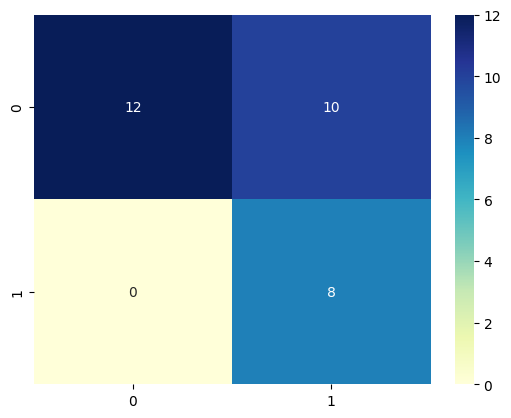

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
CM_NB=confusion_matrix(y_test1, NB_Algorithm_Prediction)
sns.heatmap(CM_NB, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, NB_Algorithm_Prediction))

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DT_Algorithm = DecisionTreeClassifier()
DT_Algorithm.fit(x_train1, y_train1)
DT_Algorithm_Prediction = DT_Algorithm.predict(x_test1)
Accuracy_DT = accuracy_score(y_test1, DT_Algorithm_Prediction)
print('Accuracy of Decision Tree Algorithm', Accuracy_DT)

Accuracy of Decision Tree Algorithm 0.7333333333333333


In [119]:
DT_Algorithm_Prediction

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0])

# **Classification report and Confusion matrix of Decision Tree Algorithm**

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        22
           1       0.50      0.62      0.56         8

    accuracy                           0.73        30
   macro avg       0.68      0.70      0.68        30
weighted avg       0.76      0.73      0.74        30



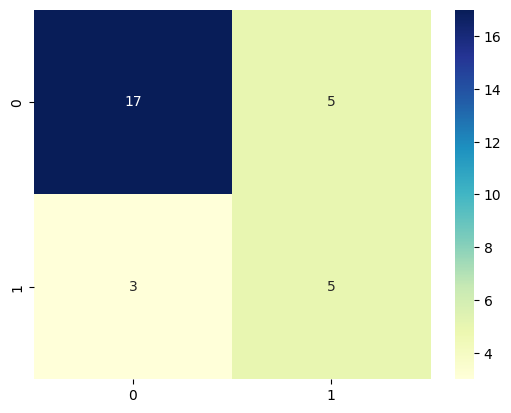

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
CM_DT=confusion_matrix(y_test1, DT_Algorithm_Prediction)
sns.heatmap(CM_DT, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, DT_Algorithm_Prediction))

# **Logistic Regression Algorithm**

In [121]:
from sklearn.linear_model import LogisticRegression
LR_Algorithm = LogisticRegression()
LR_Algorithm.fit(x_train1, y_train1)
LR_Algorithm_Prediction = LR_Algorithm.predict(x_test1)
Accuracy_LR = accuracy_score(y_test1, LR_Algorithm_Prediction)
print('Accuracy of Logistic Regression Algorithm', Accuracy_LR)

Accuracy of Logistic Regression Algorithm 0.7666666666666667


In [122]:
LR_Algorithm_Prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0])

# **Classification report and Confusion matrix of Logistic Regression Algorithm**

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.60      0.38      0.46         8

    accuracy                           0.77        30
   macro avg       0.70      0.64      0.66        30
weighted avg       0.75      0.77      0.75        30



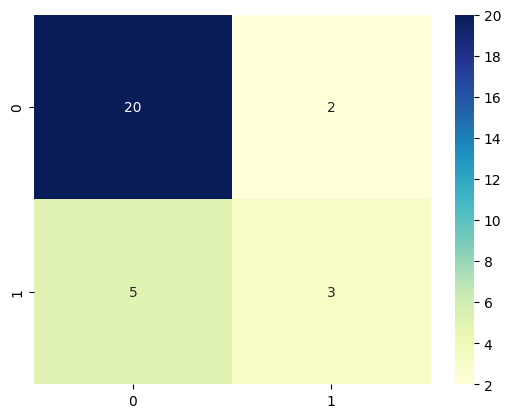

In [123]:
from sklearn.metrics import classification_report, confusion_matrix
CM_LR=confusion_matrix(y_test1, LR_Algorithm_Prediction)
sns.heatmap(CM_LR, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, LR_Algorithm_Prediction))

# **Support Vector Machine Algorithm**

In [124]:
from sklearn.svm import SVC
SVM_Algorithm = SVC()
SVM_Algorithm.fit(x_train1, y_train1)
SVM_Algorithm_Prediction = SVM_Algorithm.predict(x_test1)
Accuracy_SVM = accuracy_score(y_test1, SVM_Algorithm_Prediction)
print('Accuracy of Support Vector Machine Algorithm', Accuracy_SVM)

Accuracy of Support Vector Machine Algorithm 0.7333333333333333


In [125]:
SVM_Algorithm_Prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

# **Classification report and Confusion matrix of Support Vector Machine Algorithm**

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        22
           1       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



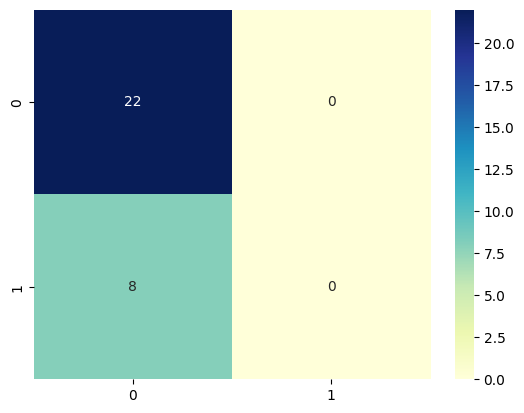

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
CM_SVM=confusion_matrix(y_test1, SVM_Algorithm_Prediction)
sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test1, SVM_Algorithm_Prediction))

# **Comparison Plot of all the Graph**

Text(0.5, 0, 'Accuracy')

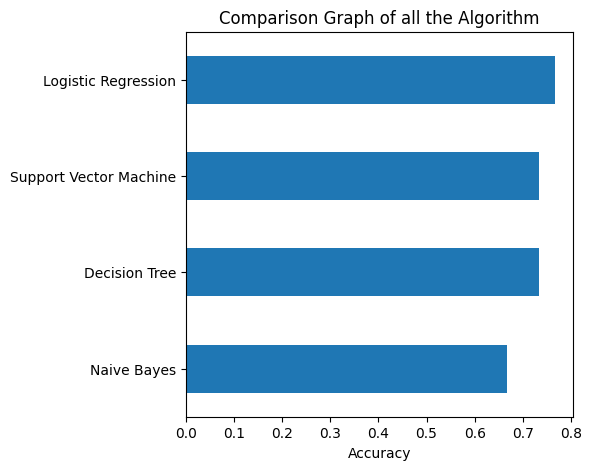

In [127]:
model_accuracy = pd.Series(data=[Accuracy_NB,Accuracy_DT,Accuracy_LR,Accuracy_SVM],
                index=['Naive Bayes','Decision Tree','Logistic Regression','Support Vector Machine'])
fig= plt.figure(figsize=(5,5))
model_accuracy.sort_values().plot.barh()
plt.title('Comparison Graph of all the Algorithm')
plt.xlabel('Accuracy')

# **Final Prediction Model**

In [129]:
def analyze_patient(patient_data):
    result = {}

    # Stats calculation
    hr_avg = patient_data["Heart Rate (bpm)"].mean()
    hr_max = patient_data["Heart Rate (bpm)"].max()
    hr_std = patient_data["Heart Rate (bpm)"].std()

    sys_avg = patient_data["Systolic"].mean()
    dia_avg = patient_data["Diastolic"].mean()

    spO2_avg = patient_data["SpO2 (%)"].mean()
    spO2_min = patient_data["SpO2 (%)"].min()

    sleep_avg = patient_data["Sleep Duration (hrs)"].mean()
    sleep_std = patient_data["Sleep Duration (hrs)"].std()
    deep_avg = patient_data["Deep Sleep (hrs)"].mean()

    stress_avg = patient_data["Stress Level (1-10)"].mean()
    stress_max = patient_data["Stress Level (1-10)"].max()

    resp_avg = patient_data["Respiratory Rate (breaths/min)"].mean()
    ecg_irregular = (0 in patient_data["ECG (Normal=1, Irregular=0)"].values)

    # Check Gender and Menstrual Cycle
    gender = patient_data["Gender (Male=0, Female=1)"].iloc[0]
    menstrual_cycle = patient_data["Menstrual Cycle (Yes=1, No=0)"].iloc[0]
    if gender == 0 and menstrual_cycle == 1:
        result["Menstrual Cycle"] = "Error: Male patients cannot have a menstrual cycle"
    elif gender == 1 and menstrual_cycle == 1:
        result["Menstrual Cycle"] = "Menstrual Cycle Present - Monitor for Regularity"
    elif gender == 1 and menstrual_cycle == 0:
        result["Menstrual Cycle"] = "No Menstrual Cycle - Normal for Non-Menstruating Females"

    # Heart Rate conditions
    if hr_avg > 100 or hr_max > 110:
        result["Heart Rate"] = "Tachycardia Risk - Consult Cardiologist"
    elif hr_avg < 60 and hr_std > 10:
        result["Heart Rate"] = "Bradycardia + Variability - Consult Cardiologist"

    # Blood Pressure conditions
    if sys_avg > 130 or dia_avg > 85:
        result["BP"] = "Hypertension Risk - Consult Cardiologist Urgently"
    elif sys_avg > 120:
        result["BP"] = "Prehypertension Risk - Consult Cardiologist"

    # SpO2 conditions
    if spO2_avg < 95 or (spO2_min < 92 and resp_avg > 18):
        result["SpO2"] = "Hypoxemia, Possible Sleep Apnea - Consult Pulmonologist"

    # Sleep and Stress correlation
    if sleep_avg < 7 and sleep_std > 1.5:
        result["Sleep"] = "Sleep Deprivation + Inconsistency - Consult Sleep Specialist"
    if deep_avg < 1.2:
        result["Deep Sleep"] = "Poor Restorative Sleep - Consult Sleep Specialist"
    if stress_avg > 5 and stress_max > 8 and sleep_avg < 7:
        result["Stress"] = "Chronic Stress + Fatigue - Consult Psychologist"

    # ECG considerations
    if ecg_irregular and hr_std > 10:
        result["ECG"] = "Arrhythmia Risk (High Variability) - Consult Cardiologist Urgently"

    return result

In [132]:
Final_Prediction_data = np.array([
    71,   # Heart Rate (bpm)
    95,   # SpO2 (%)
    7.5,  # Sleep Duration (hrs)
    3.1,  # Light Sleep (hrs)
    1.2,  # Deep Sleep (hrs)
    3.2,  # REM Sleep (hrs)
    6922, # Steps Count
    308,  # Calories Burned
    3.9,  # Distance Walked (km)
    8,    # Stress Level (1-10)
    16,   # Respiratory Rate (breaths/min)
    1,    # ECG (Normal=1, Irregular=0)
    37.1, # Skin Temperature (°C)
    1,    # Menstrual Cycle (Yes=1, No=0)
    1,    # Fall Detected (Yes=1, No=0)
    1.7,  # Water Intake (litres)
    138,  # Systolic
    93,   # Diastolic
    1     # Gender (Male=0, Female=1)
]).reshape(1, -1)

# Select features for prediction (including Gender)
Final_Prediction_data_selected = Final_Prediction_data[:, [0, 16, 17, 1, 6, 9, 11, 18]]  # Indices for features

# Make prediction using Logistic Regression
Final_prediction = LR_Algorithm.predict(Final_Prediction_data_selected)

# Create a DataFrame for analyze_patient
patient_df = pd.DataFrame(Final_Prediction_data, columns=[
    "Heart Rate (bpm)", "SpO2 (%)", "Sleep Duration (hrs)", "Light Sleep (hrs)",
    "Deep Sleep (hrs)", "REM Sleep (hrs)", "Steps Count", "Calories Burned",
    "Distance Walked (km)", "Stress Level (1-10)", "Respiratory Rate (breaths/min)",
    "ECG (Normal=1, Irregular=0)", "Skin Temperature (°C)", "Menstrual Cycle (Yes=1, No=0)",
    "Fall Detected (Yes=1, No=0)", "Water Intake (litres)", "Systolic", "Diastolic",
    "Gender (Male=0, Female=1)"
])

# Perform health analysis
print('\nPatient Health Analysis:')
analysis_results = analyze_patient(patient_df)
for param, pred in analysis_results.items():
    print(f"{param}: {pred}")

# Interpret and print the prediction
print('\nPatient Condition Prediction:')
if Final_prediction[0] == 0:
    print("The Patient Condition is Low")
elif Final_prediction[0] == 1:
    print("The Patient Condition is Medium")
else:
    print("The Patient Condition is High")


Patient Health Analysis:
Menstrual Cycle: Menstrual Cycle Present - Monitor for Regularity
BP: Hypertension Risk - Consult Cardiologist Urgently

Patient Condition Prediction:
The Patient Condition is Medium
